# Figure generation for Bird-Beak Paper

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import math
import matplotlib.lines as mlines
from matplotlib.text import OffsetFrom
from tqdm import tqdm
import tevar_heatmap as th
from tqdm import tqdm_notebook as pbar
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from functools import reduce
import seaborn as sns



In [2]:
# Re-load imports before each cell execution. Allows us to edit helper functions without having to manually reload the module.
%load_ext autoreload
%autoreload 2

In [3]:
# Patient IDs
patients = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
patients = [5] # For debugging

# Location of files
file_path = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/"


## Load files

In [4]:
# File name structures of TEVAR patients.
file_name_root = file_path + 'T{}_pre_ID_{}.csv'  

# Coordinates of aortic contours
aortic_contours_fn = 'contours'

# Curvature and diameter with respect to aortic arclength
arc_curve_diam_cd_fn = 'arc_curve_diam_CD'

# Aortic innerline
aortic_innerline_fn = 'smoothed_innerline'

# Endograft
graft_fn = 'endograft'

# Proximal landing point
plp_fn = 'a1plp'

# Birdbeak data
bbh_data = pd.read_csv('bbh.csv')

graft_data = pd.read_csv('G.csv')

In [5]:
patients = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


# Results Figures

## Aorta and chart

## Bird-beak Colormap

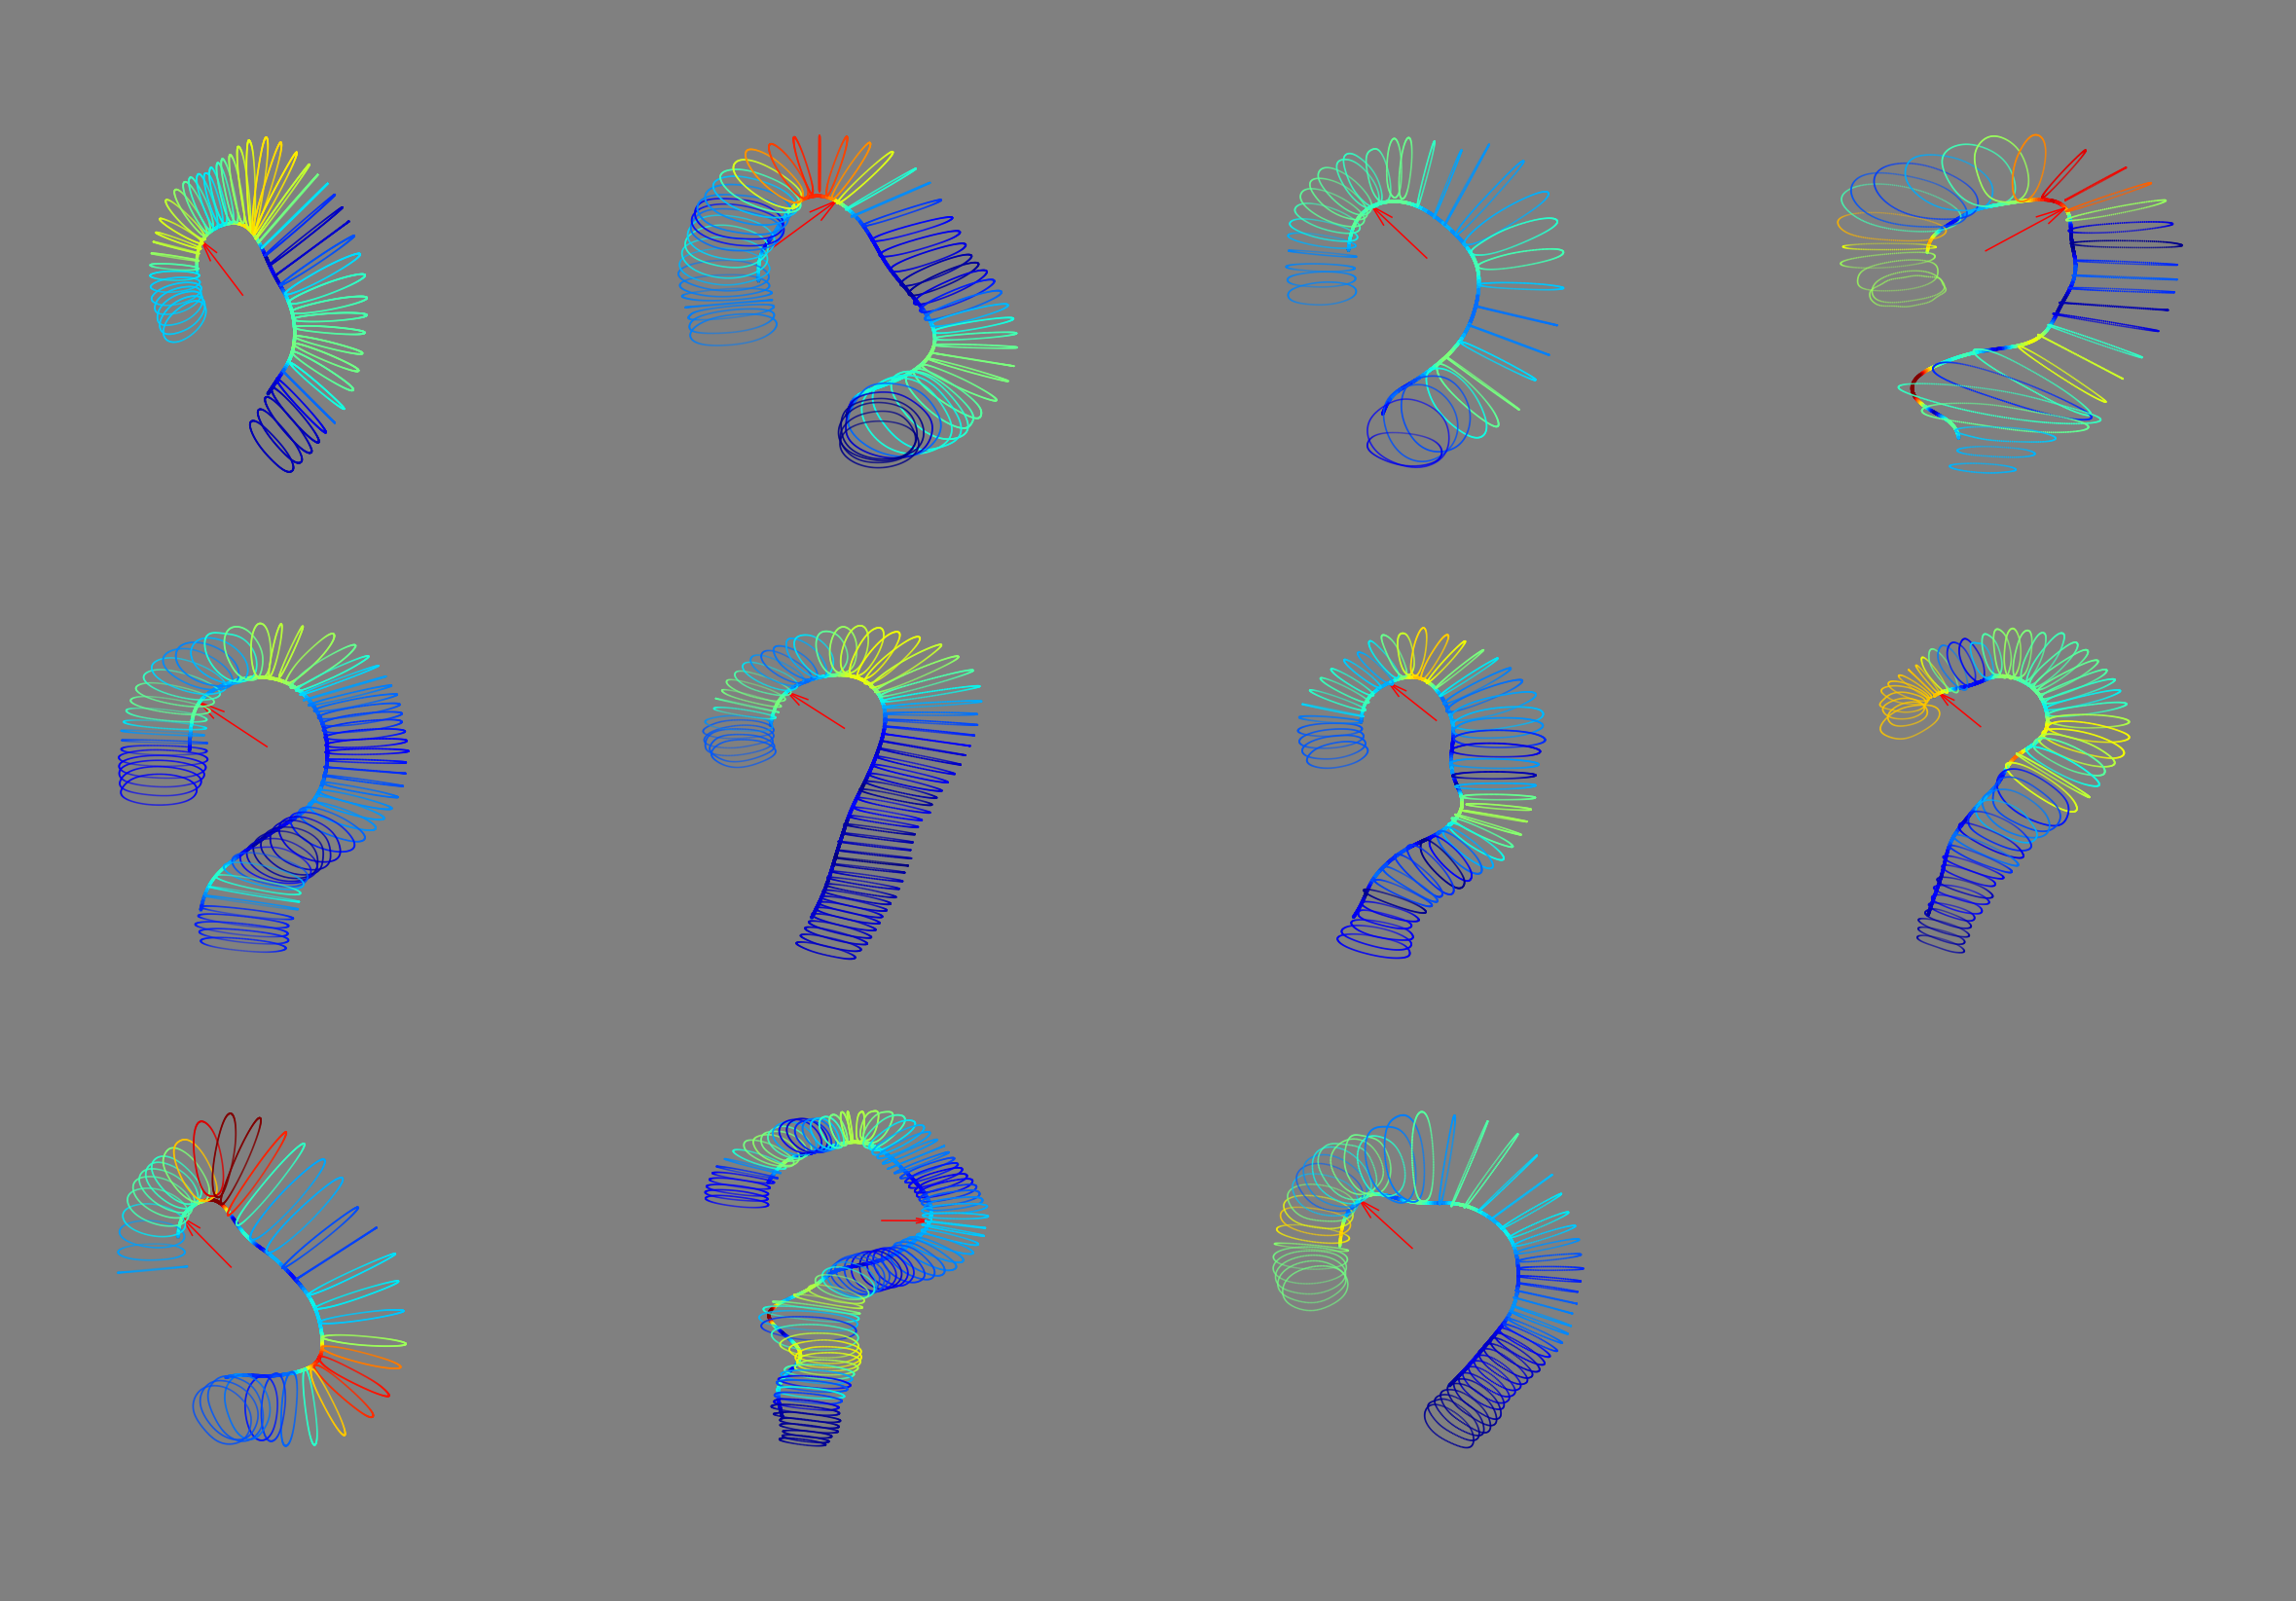

In [6]:
%matplotlib inline
patients_bb = [1,5,6,9,11,13,14,15,16,19,22]
pat_id = 12
min_cd = 0
max_cd = 3
subplotnum = 1
num_plots = len(patients_bb)
height = 50
width = 30
fig = plt.figure(figsize=(height, width))
plt.tight_layout()
arrow_vectors = [[0, 1, 1], [0, -1, 1], [0, 1, 1], [0, -1, 1],
                 [0, 1, 1], [0, 1, 1],  [0, 1, 1], [0, 1, 1],
                 [0, 1, 1], [0, -1, 0], [0, 1, 1], [0, 1, 1]]

plt_dims = (3, 4)
gs = gridspec.GridSpec(3,4)
gs.update(wspace=-0.4, hspace=-0.2)
#patients_bb = [1]
for pat_id in pbar(patients_bb):
    pat_index = patients_bb.index(pat_id)
    arrow_direction_vector = arrow_vectors[pat_index]
    cmap = th.tevar_fig_gen(pat_id,
                     file_name_root,
                     aortic_contours_fn,
                     arc_curve_diam_cd_fn,
                     aortic_innerline_fn,
                     plp_fn,
                     min_cd,
                     max_cd,
                     bbh_data,
                     pat_index,
                     subplotnum,
                     fig,
                     plt_dims, 
                     arrow_direction_vector,
                     gs)
    subplotnum += 1
#fig.colorbar(cmap)
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().set_facecolor([.5,.5,.5])
#fig.patch.set_facecolor([.7,.7,.7])
plt.savefig('/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/figures/aortic_heatmap_subplots.jpeg', dpi=400, bbox_inches='tight', facecolor = fig.get_facecolor(), transparent = True)
plt.show()


In [7]:
help(fig.add_subplot)

Help on method add_subplot in module matplotlib.figure:

add_subplot(*args, **kwargs) method of matplotlib.figure.Figure instance
    Add an `~.axes.Axes` to the figure as part of a subplot arrangement.
    
    Call signatures::
    
       add_subplot(nrows, ncols, index, **kwargs)
       add_subplot(pos, **kwargs)
       add_subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
        fig.add_subpl

In [8]:
aortic_contours, aortic_innerline, curvature_data, plp, bbh = th.load_and_process(aortic_contours_fn,
                     aortic_innerline_fn,
                     arc_curve_diam_cd_fn,
                     file_name_root,
                     0,
                     4,
                     pat_id, plp_fn, bbh_data, pat_index)
bbh

5.44

## Data 

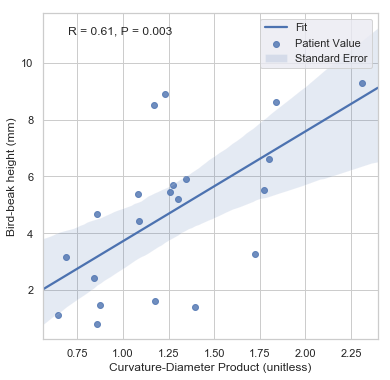

In [9]:
# Curvature and Diameter
curv = pd.read_csv('C.csv')
diam = pd.read_csv('D.csv')
grft = pd.read_csv('G.csv')
bbh = pd.read_csv('bbh.csv')
bbl_bba= pd.read_csv('bbl_bba.csv')

cd = pd.DataFrame({"cd": curv.C.values * diam.D.values})
r,p = pearsonr(cd.cd, bbh.bbh)
fig = plt.figure(figsize=(6,6), frameon=False)
sns.set(style="darkgrid")
cd_bbh = pd.DataFrame(columns=['cd', 'bbh'])

cd_bbh['cd'] = cd.cd.copy()
cd_bbh['bbh'] = bbh.bbh.copy()
cd_bbh['c'] = curv.C.copy()
cd_bbh['d'] = diam.D.copy()
cd_bbh['g'] = grft.G.copy()

with sns.axes_style('whitegrid'):
    sns.regplot("cd", "bbh", cd_bbh)
#plt.grid()
# plt.plot(cd.cd, bbh.bbh,'o')
# plt.grid()
plt.xlabel("Curvature-Diameter Product (unitless)")
plt.text(.7,11, "R = {:.2f}, P = {:.3f}".format(r,p))
plt.legend(['Fit', 'Patient Value', 'Standard Error'])
plt.ylabel("Bird-beak height (mm)")
plt.savefig("/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/figures/cd_correlation.png",dpi=500)
plt.show()

# Demographics table

In [10]:
save_location = "/Users/maxfrohlich/Dropbox/Stanford-SJSU-Manuscript/Max - Kelly Meeting 20181117/"


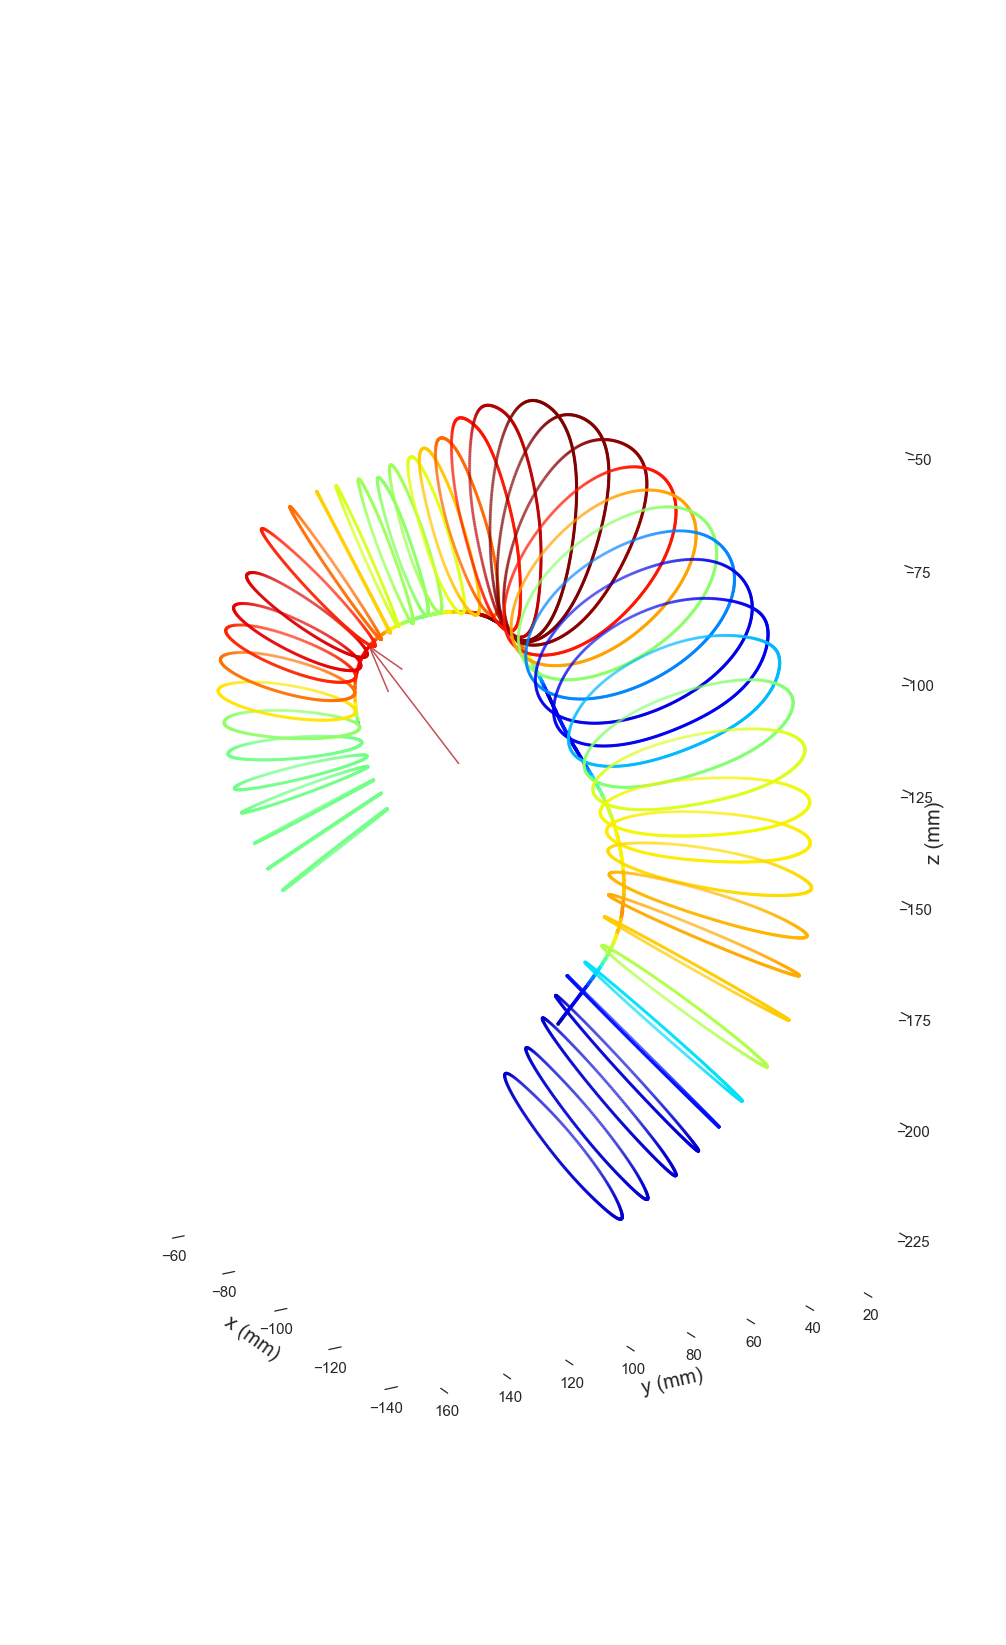

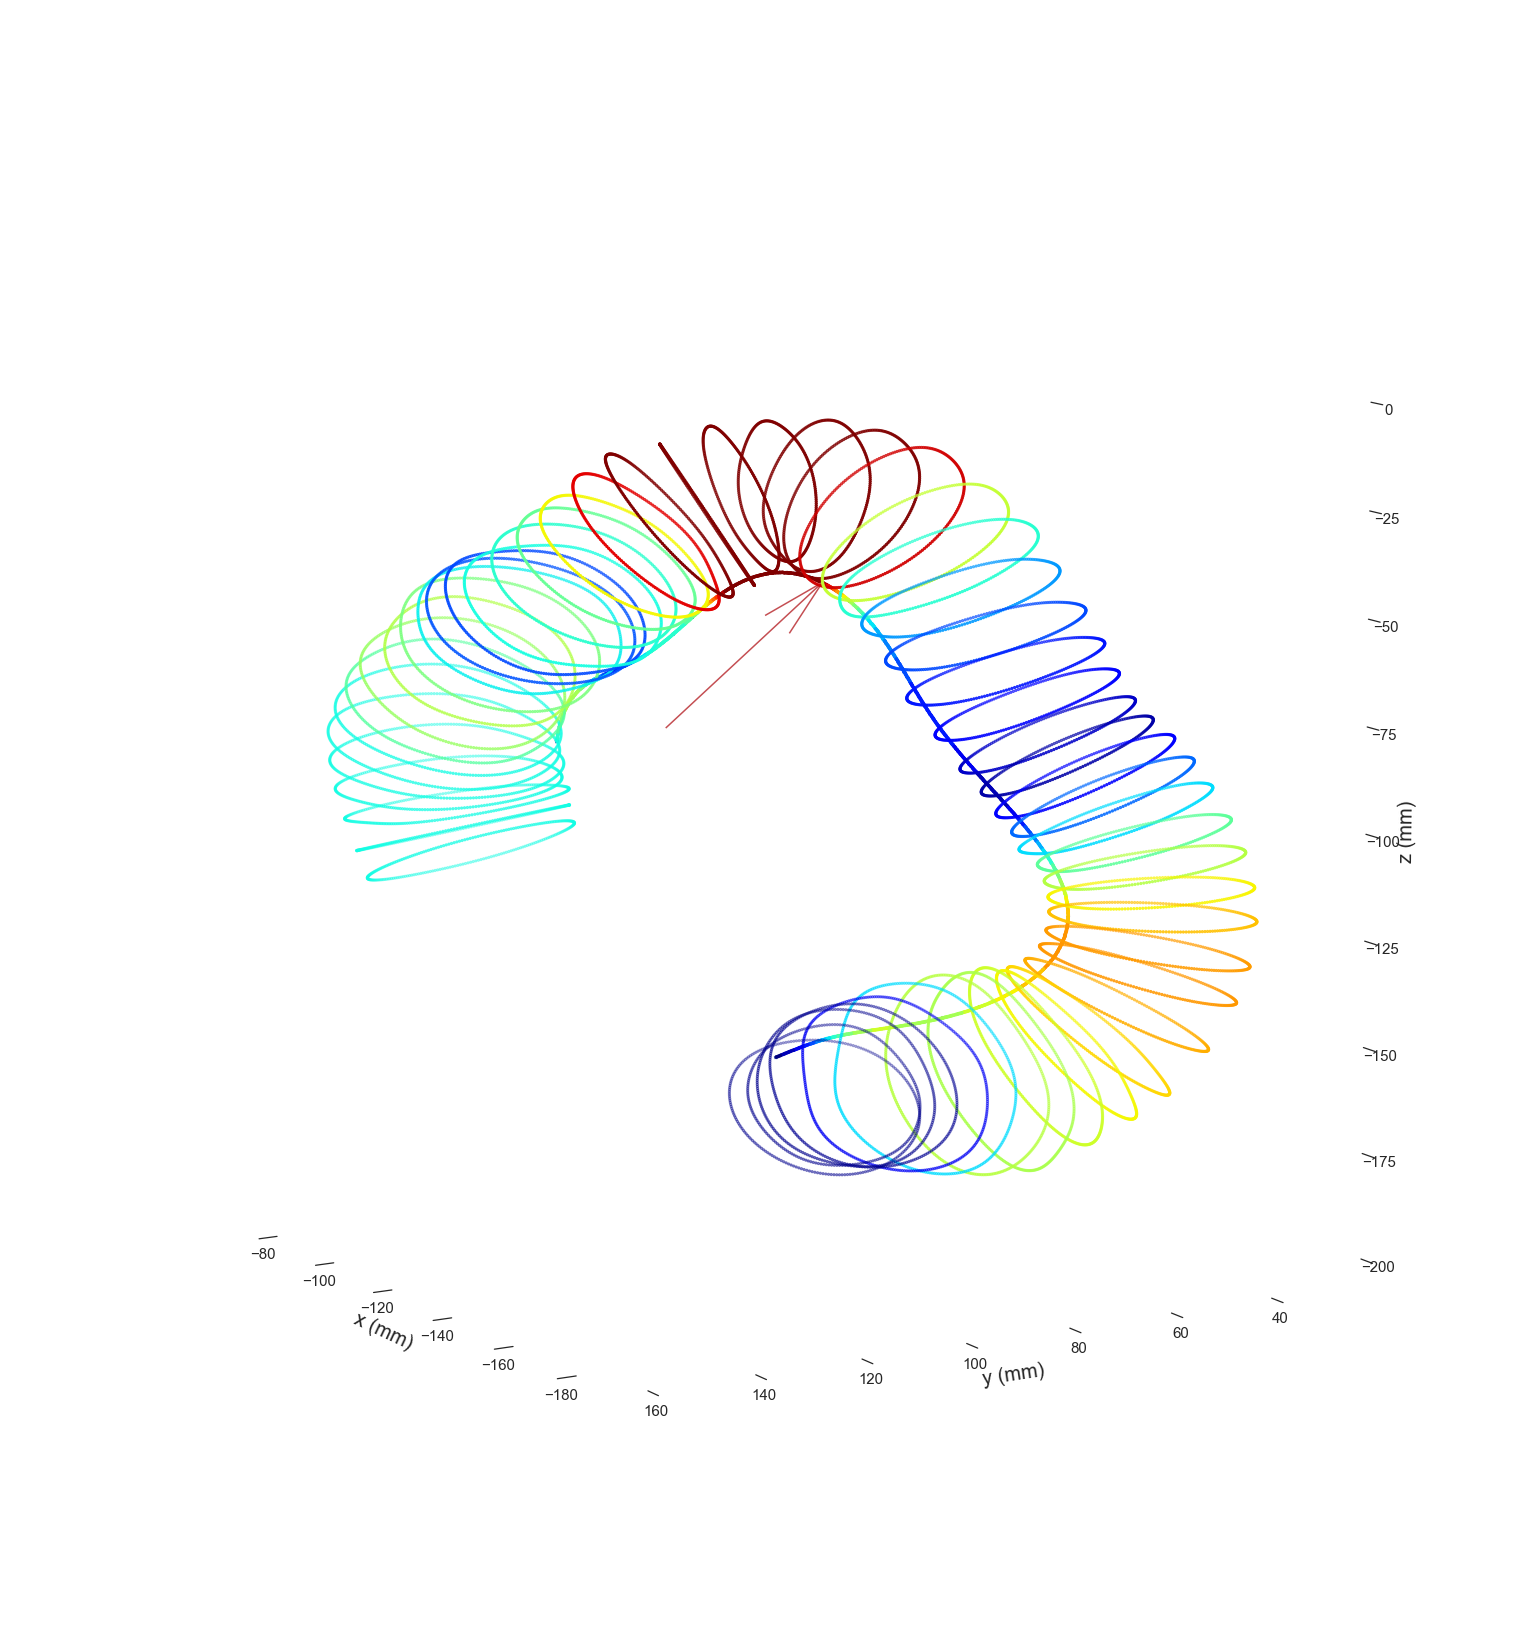

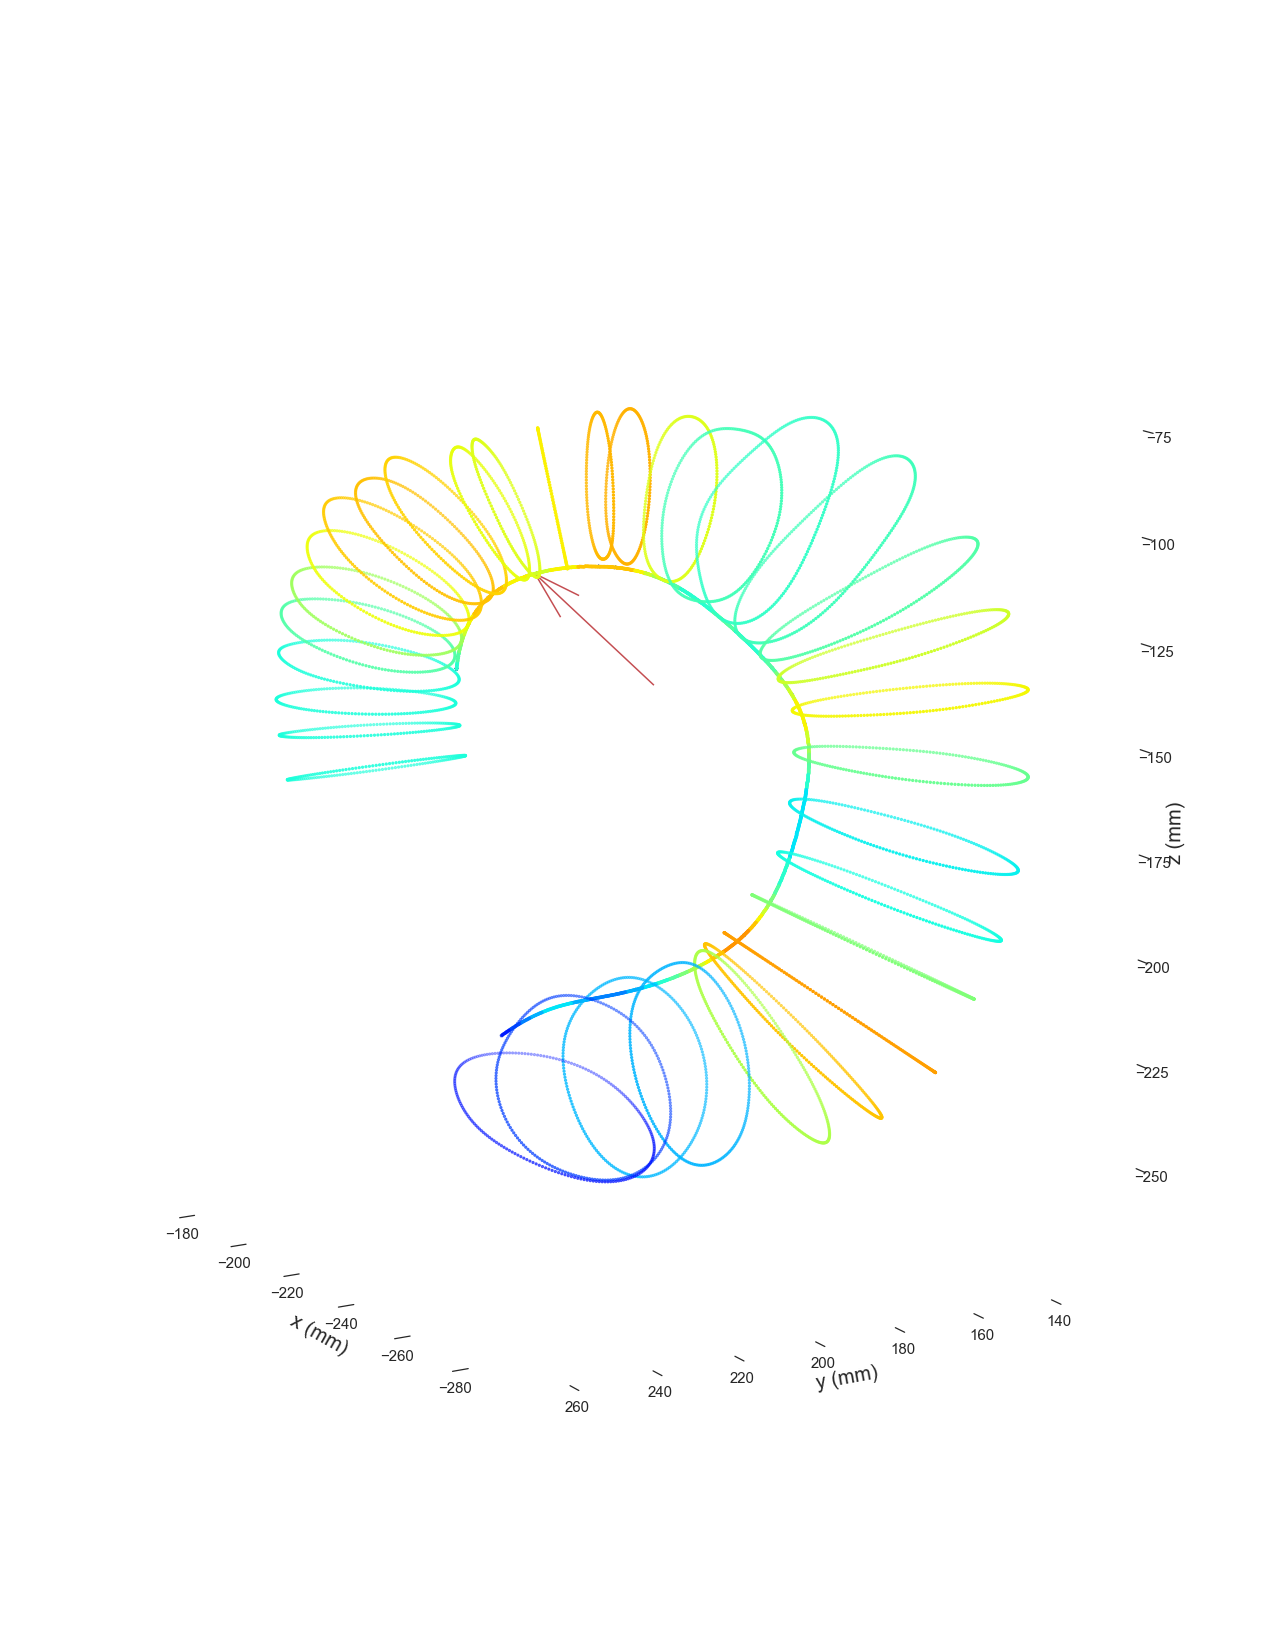

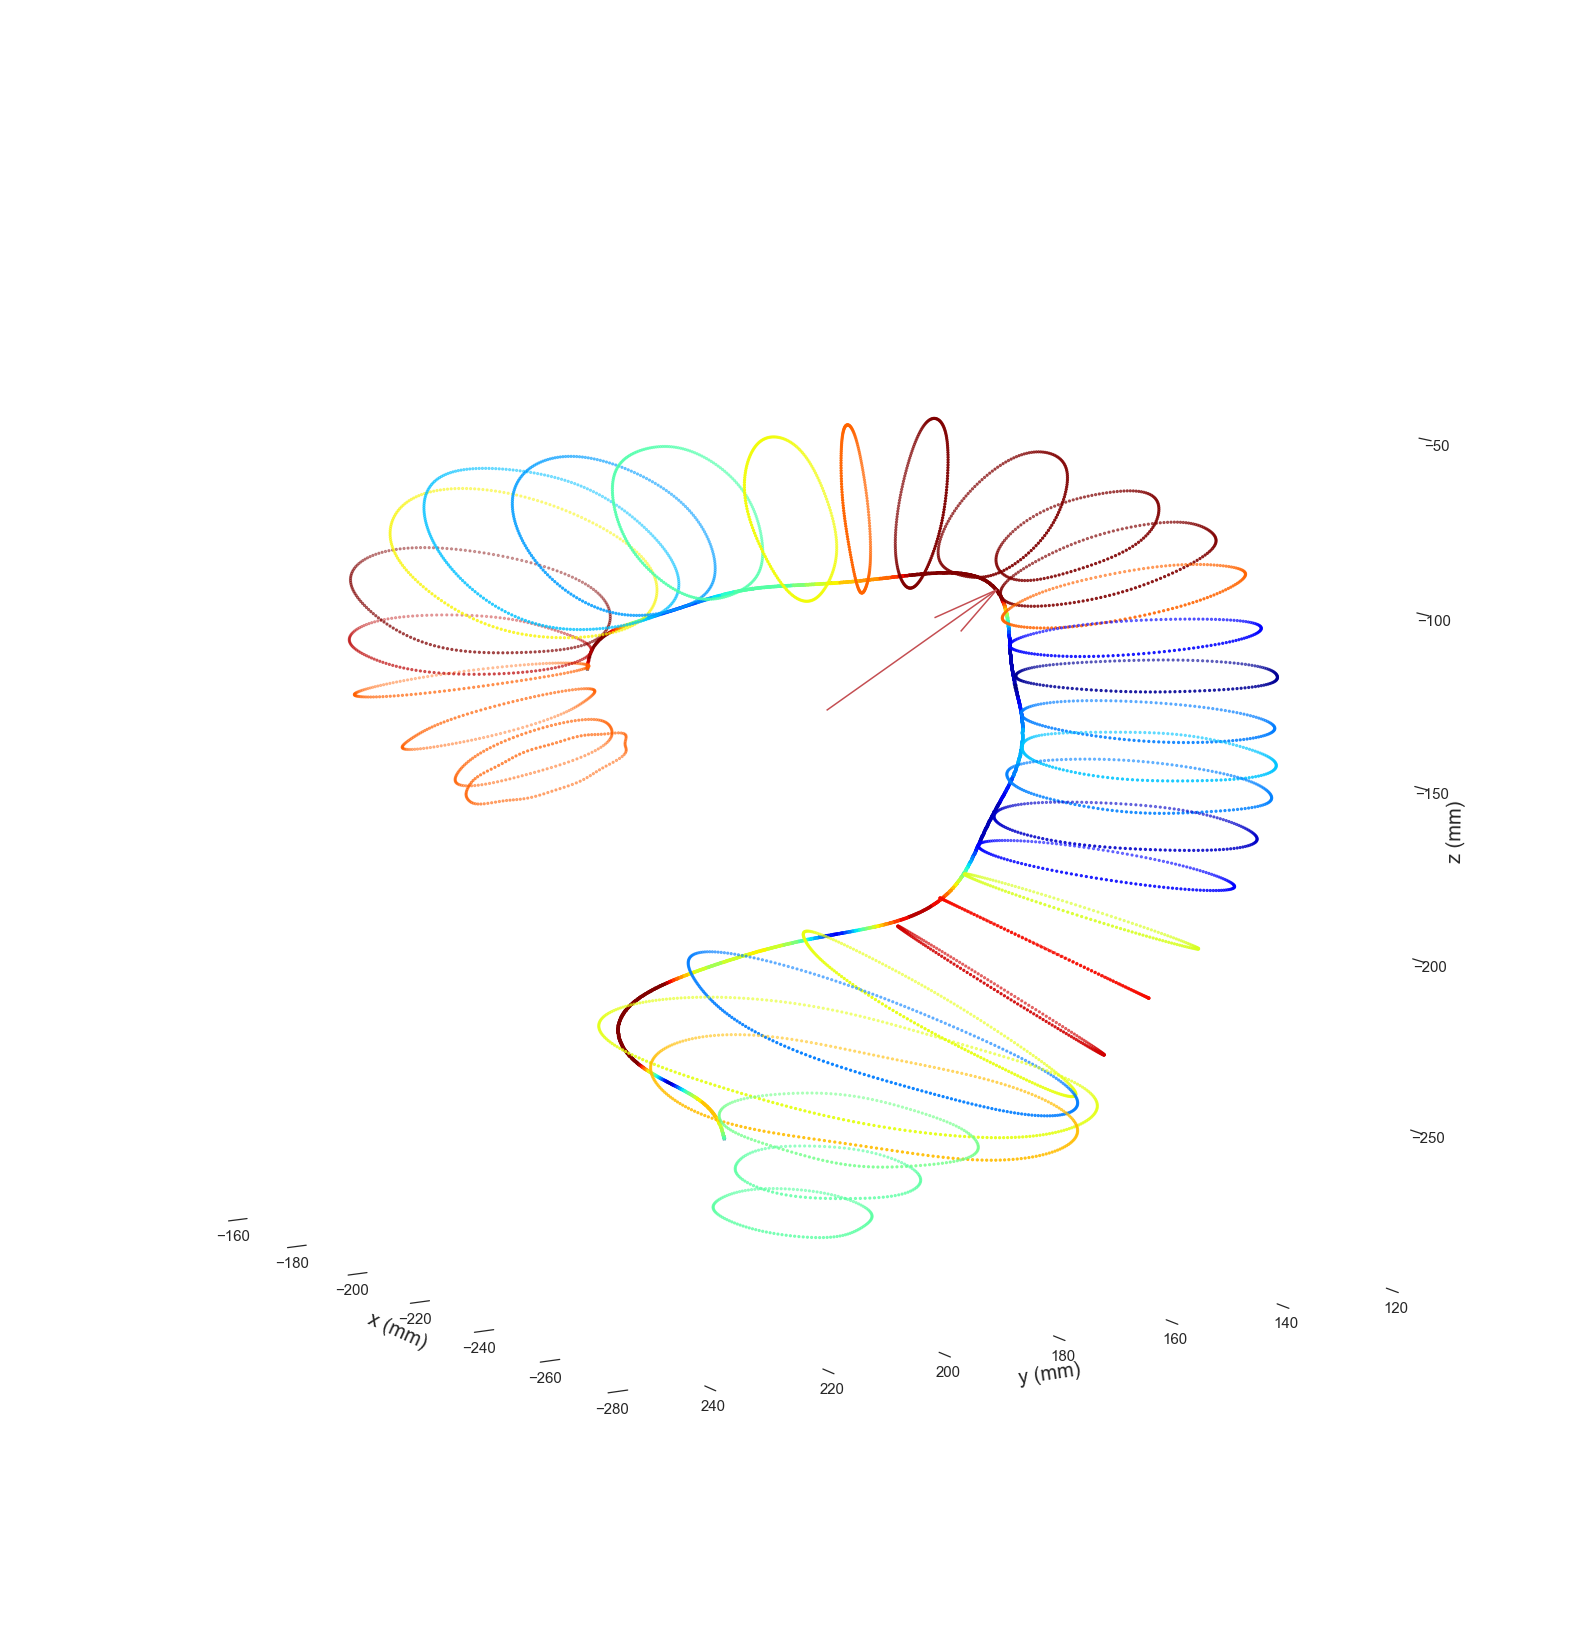

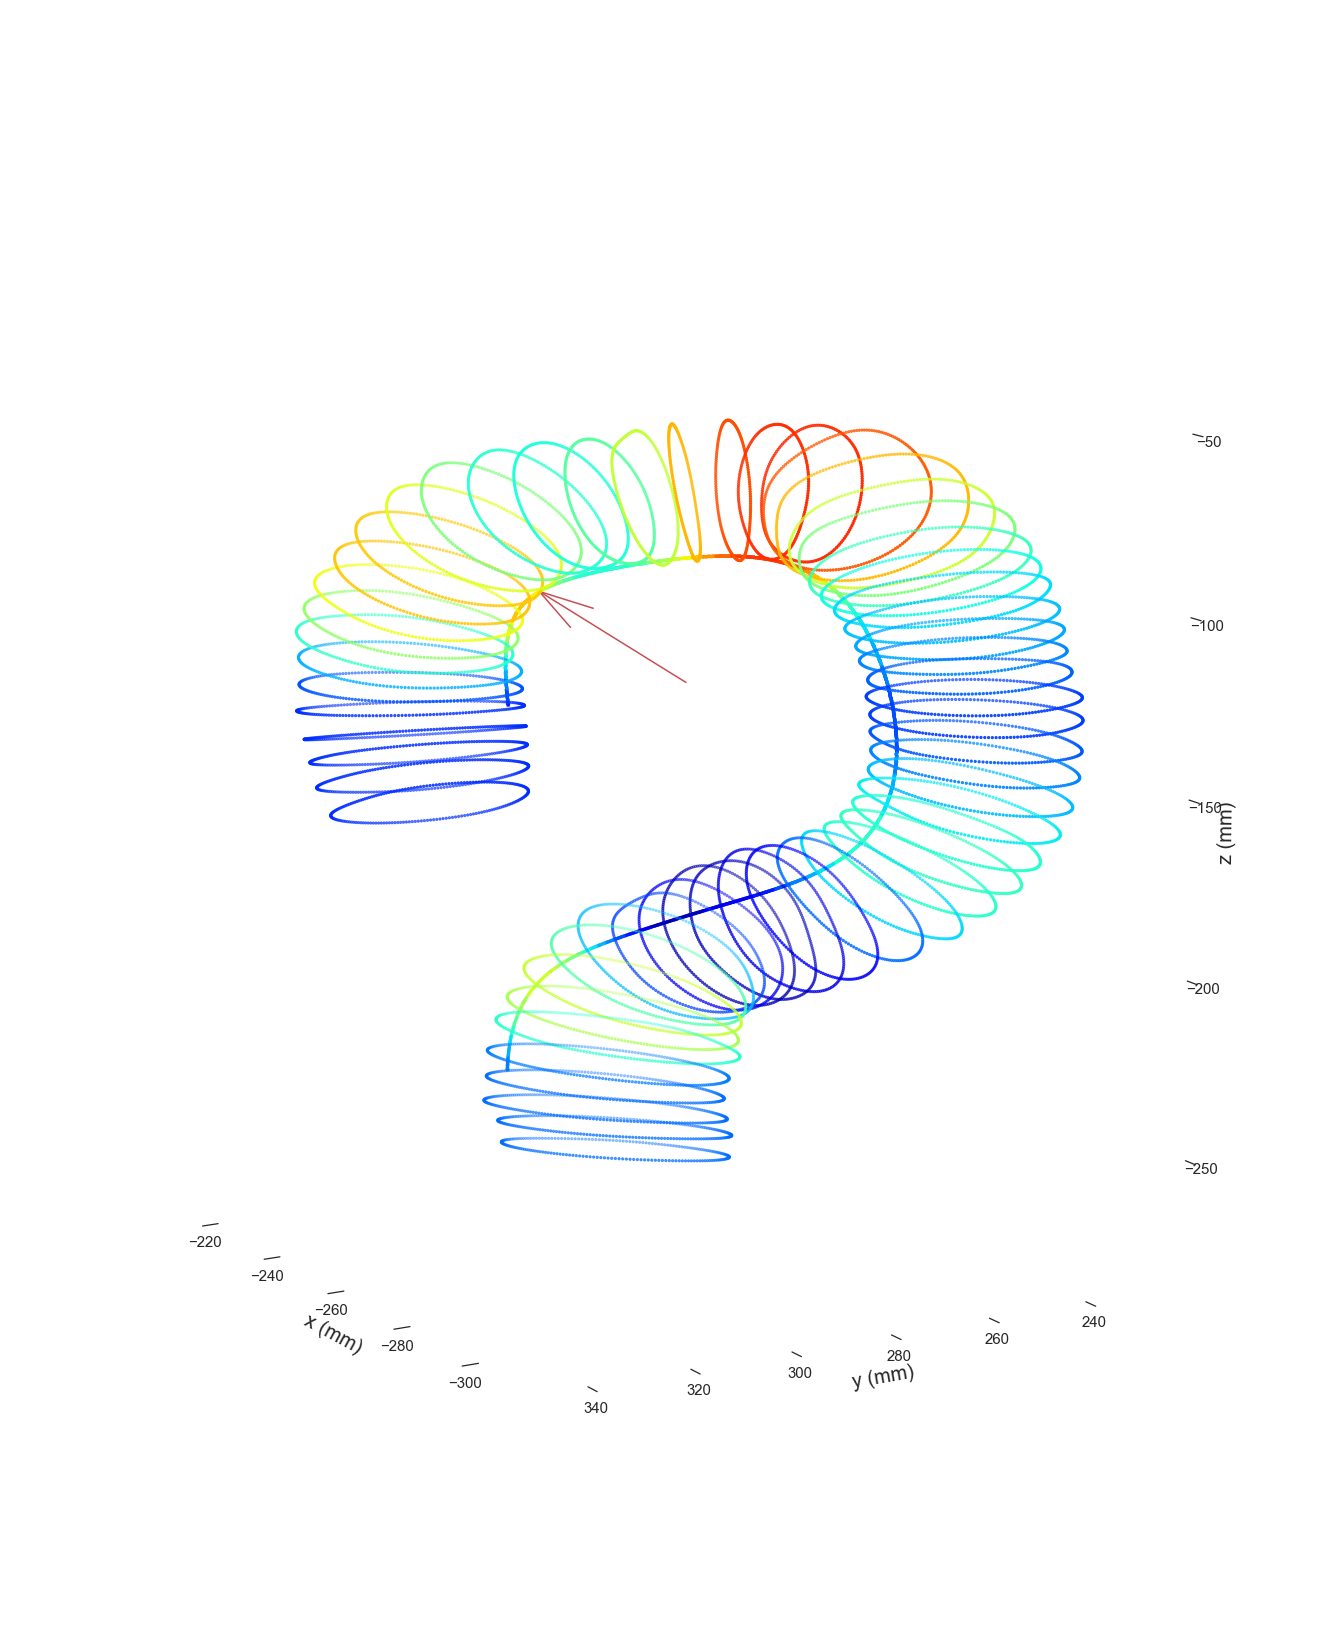

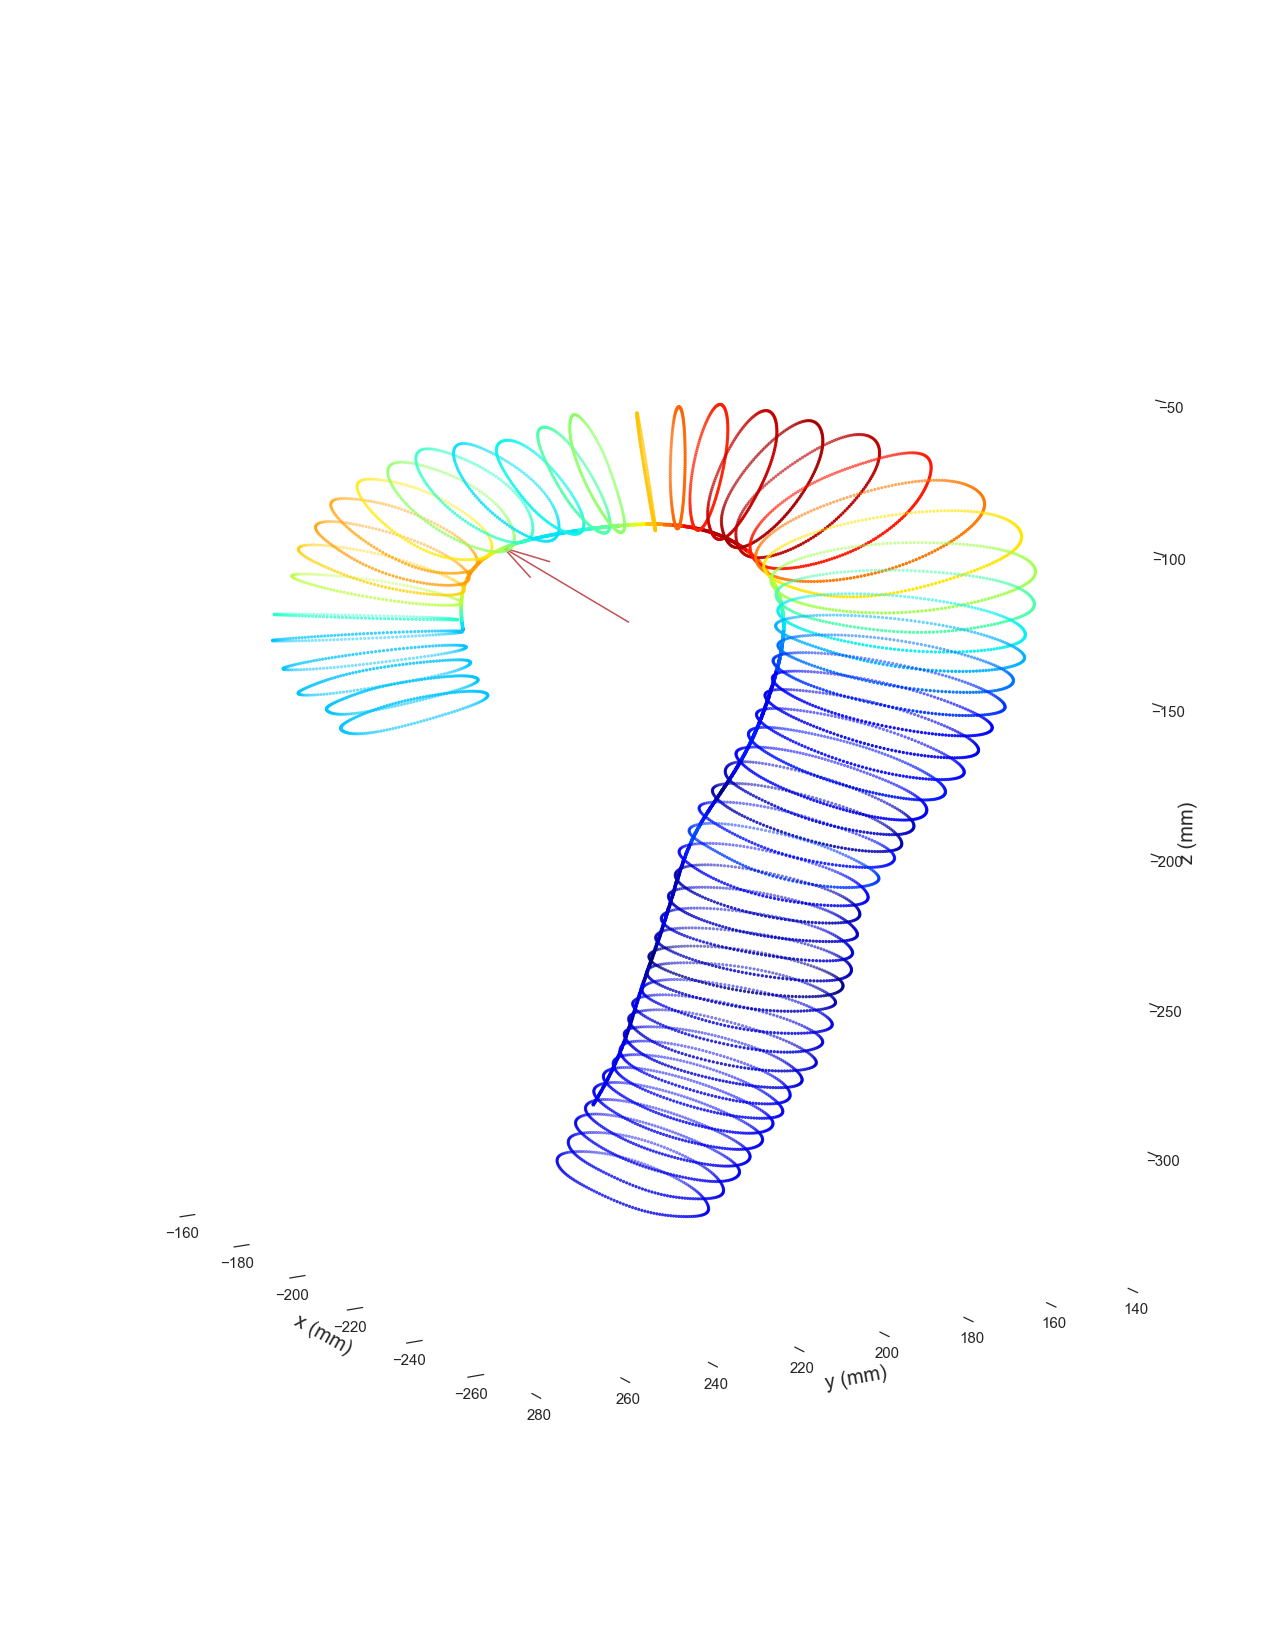

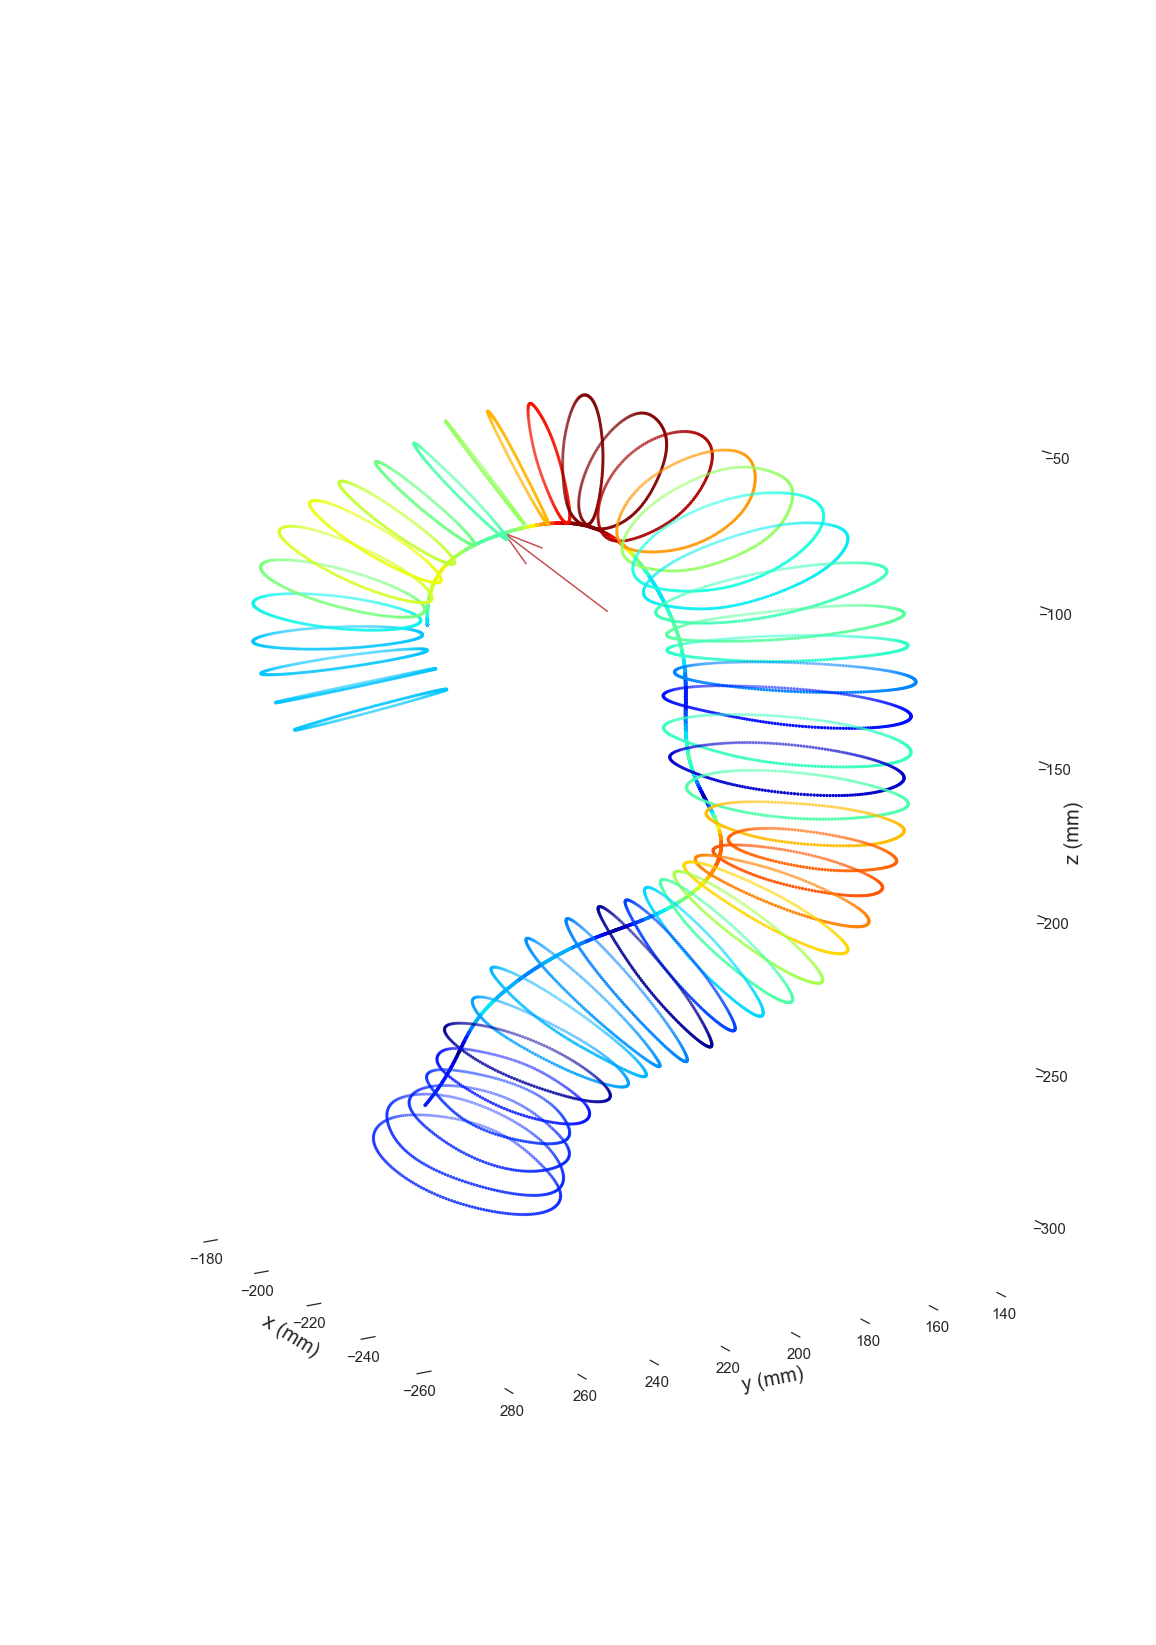

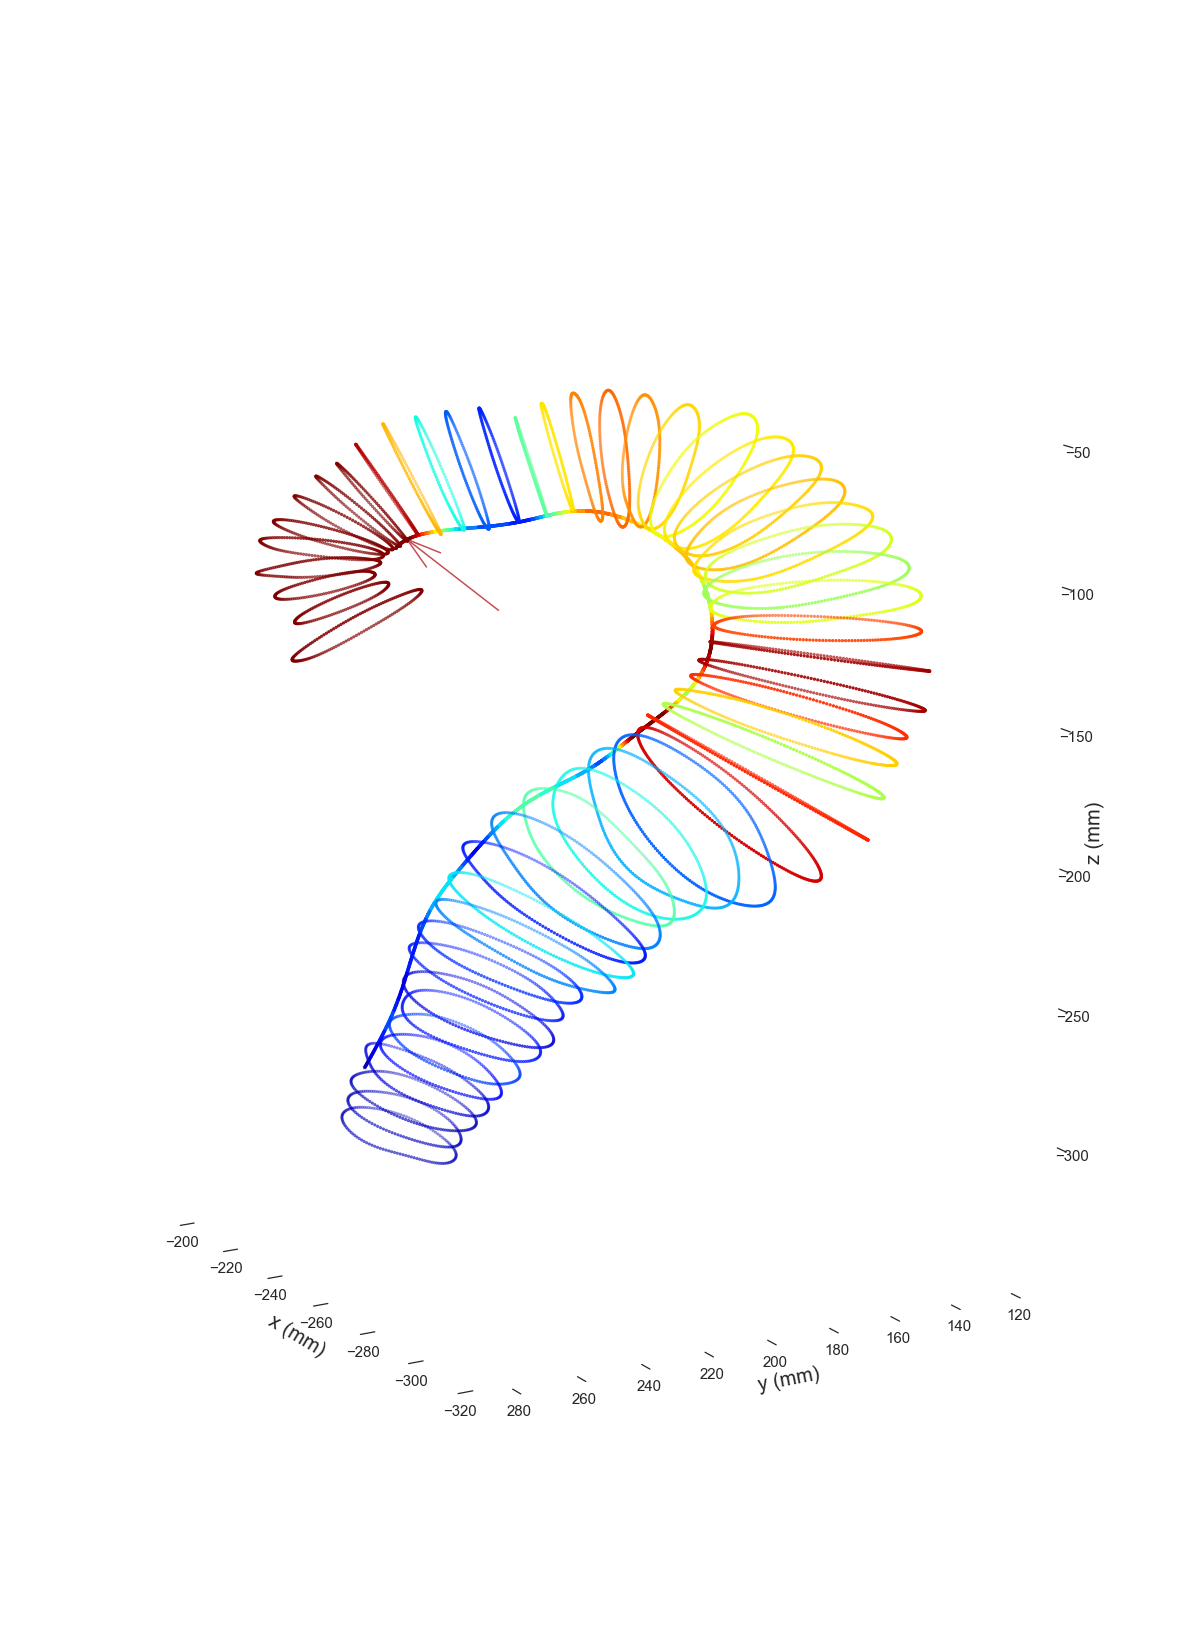

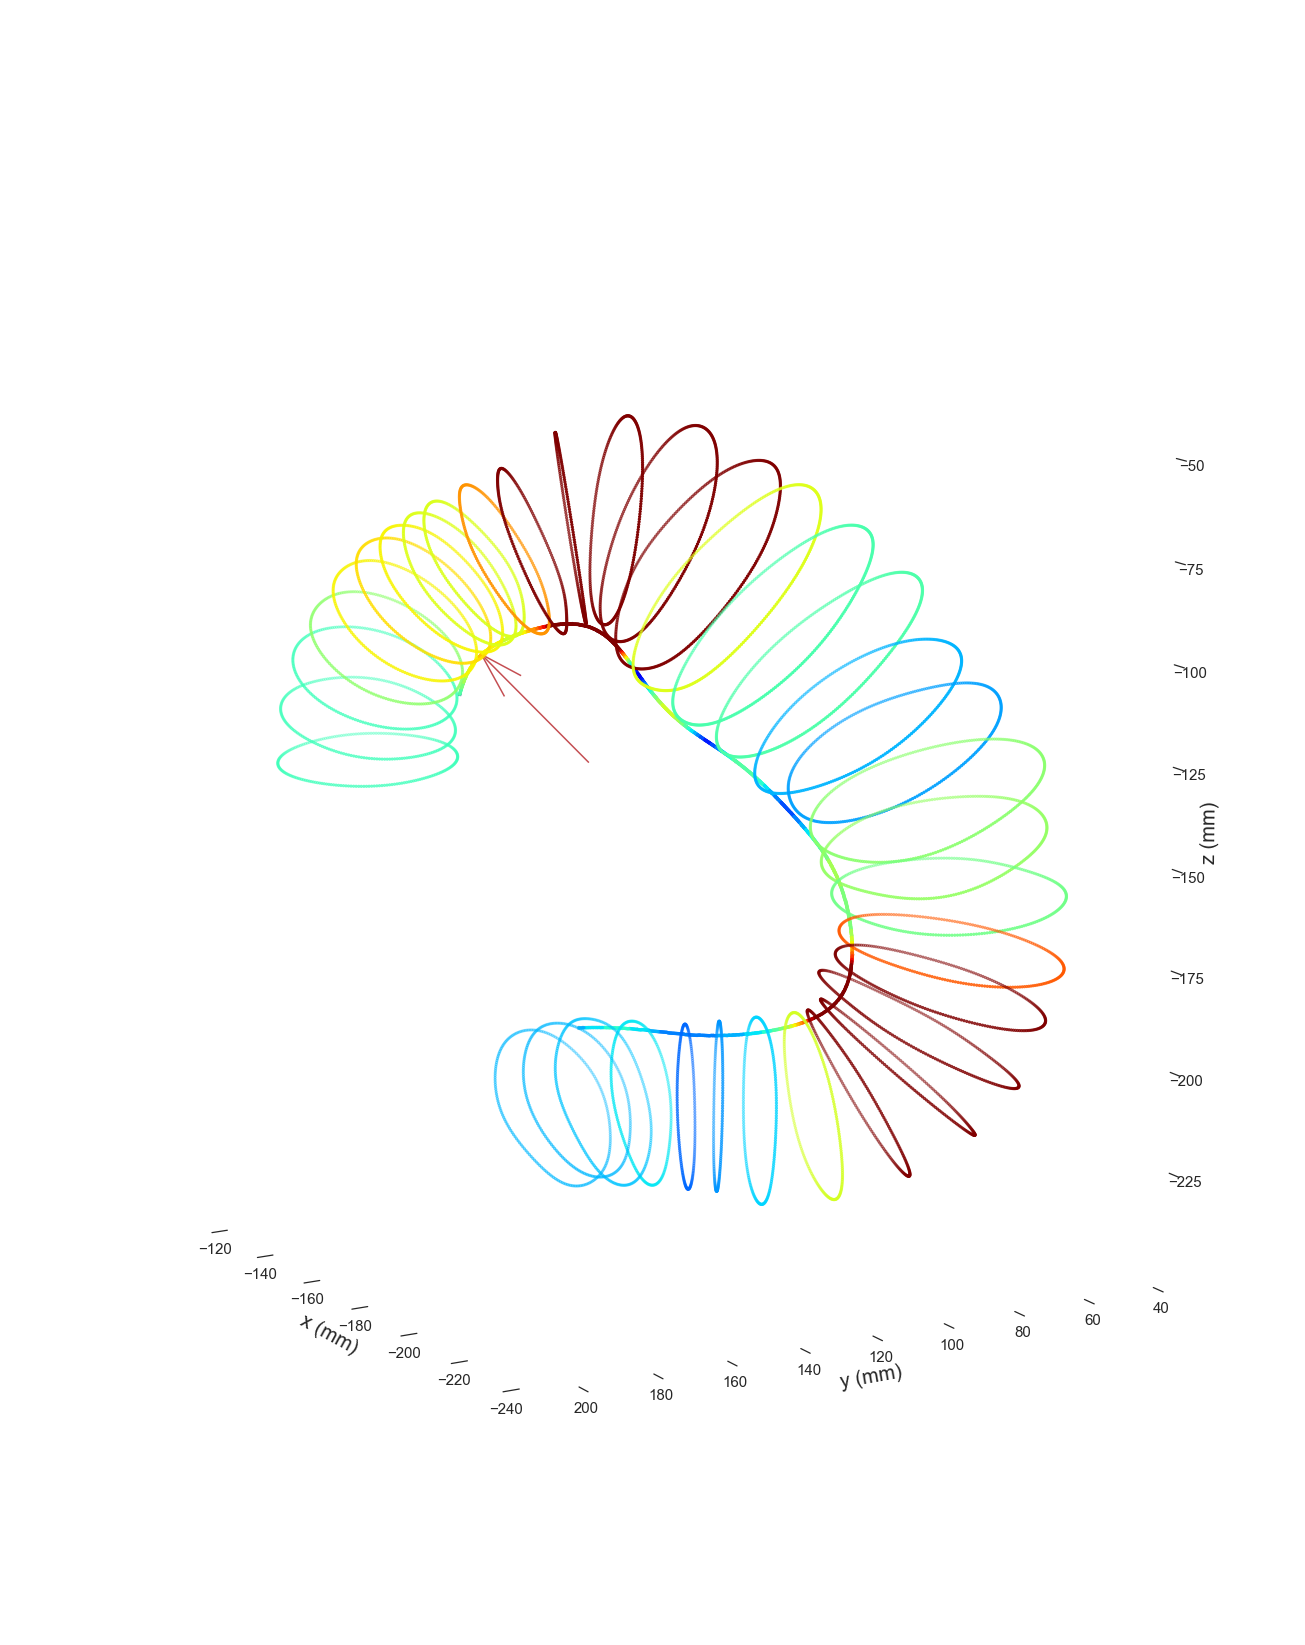

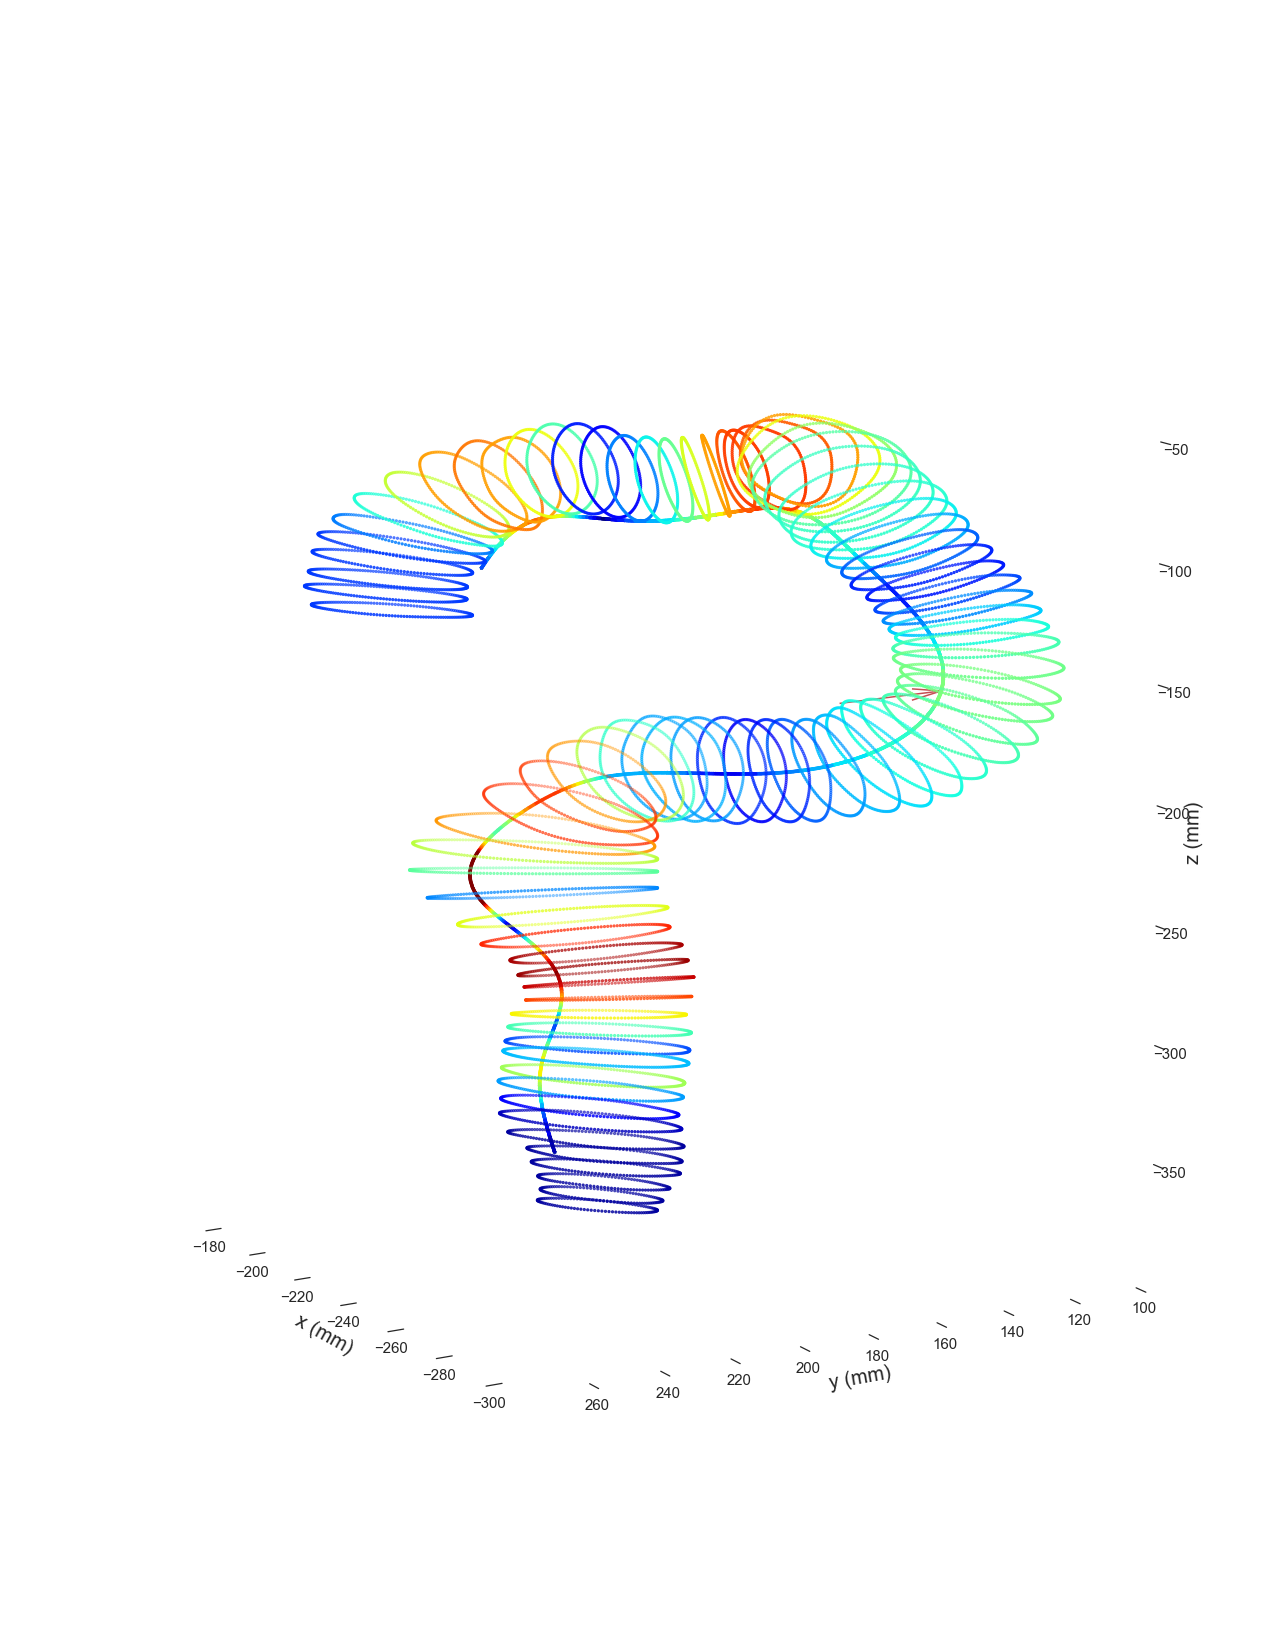

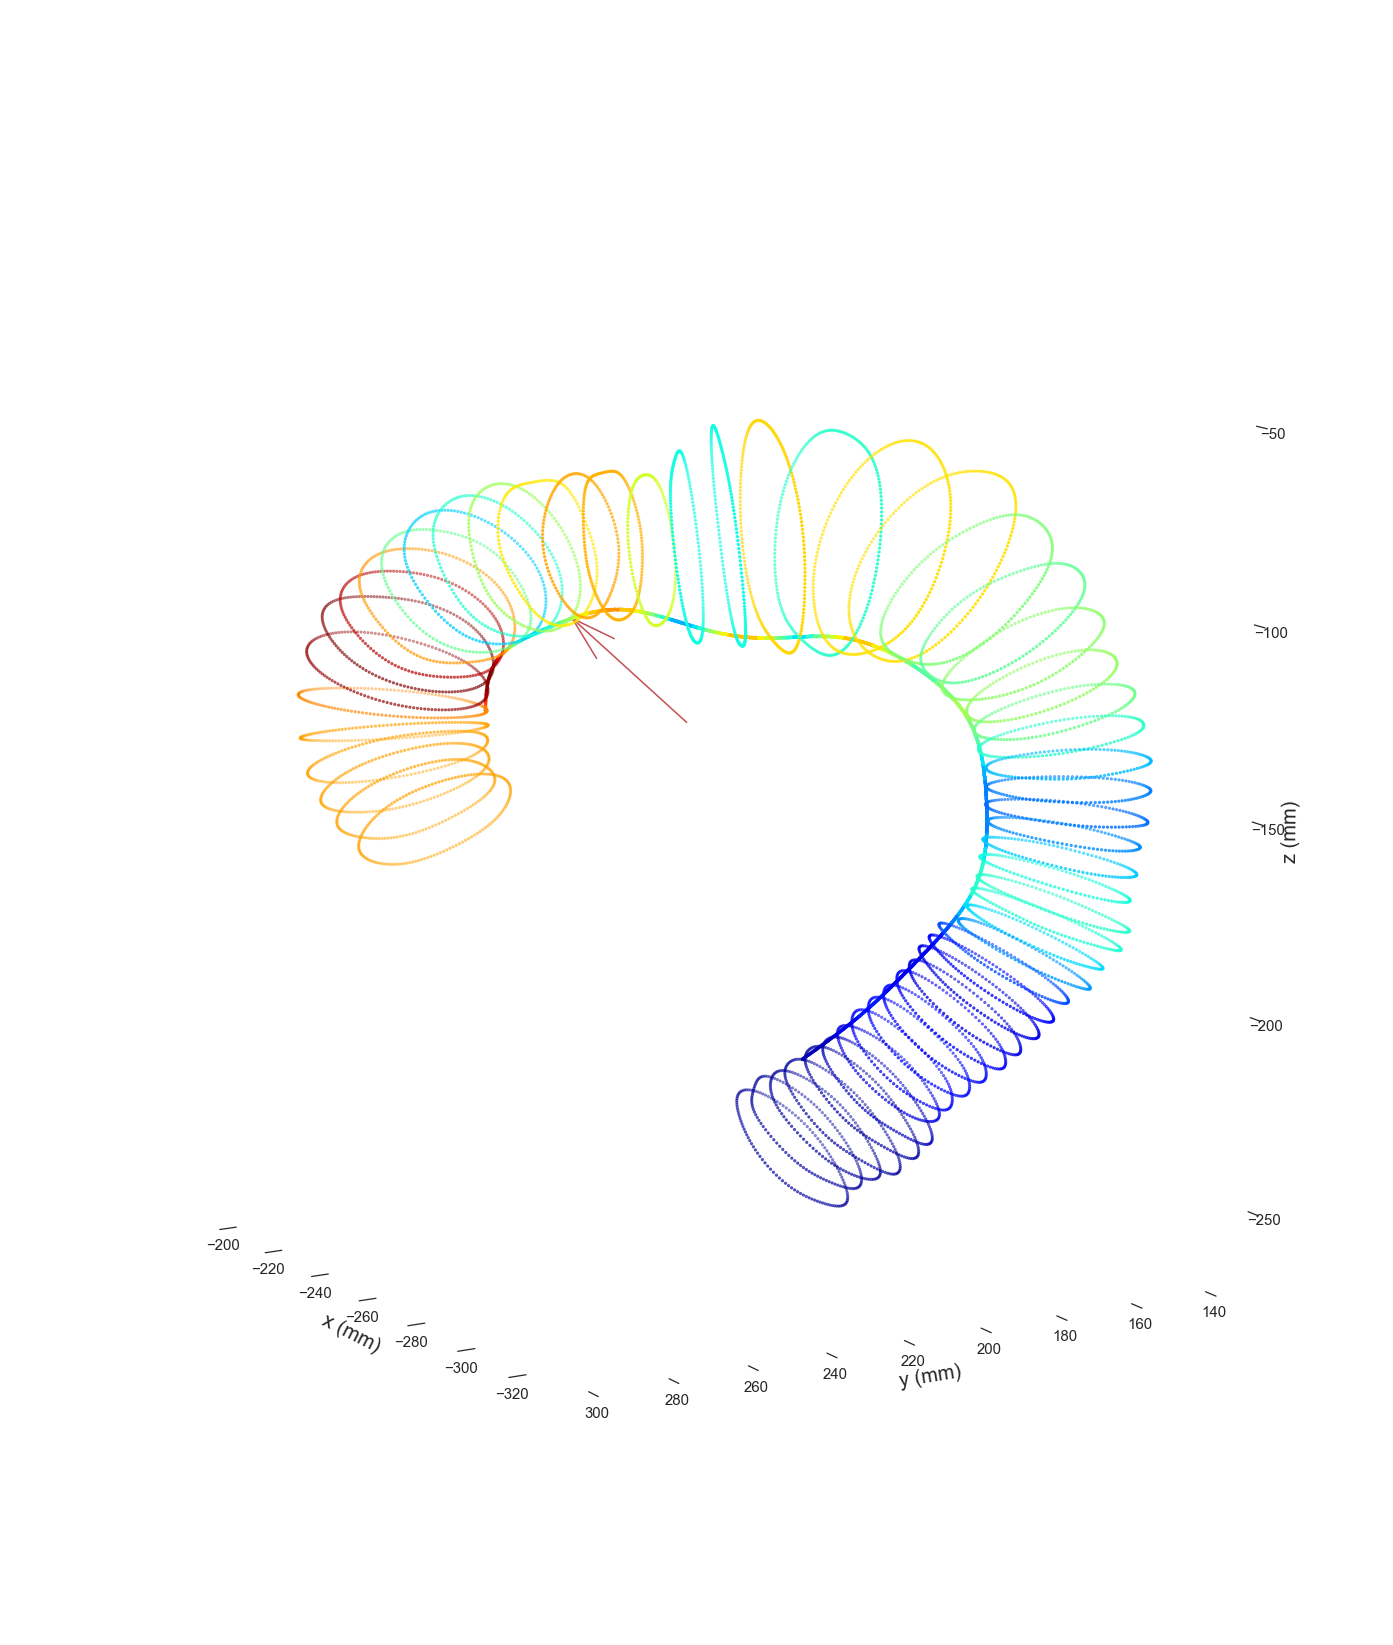

In [11]:
%matplotlib inline
patients_bb = [1,5,6,9,11,13,14,15,16,19,22]

paper_pat_id = [1,4,5,7,9,11,12,13,14,17,20]
#pat_id = 12
min_cd = 0
max_cd = 2
num_plots = len(patients_bb)
height = 50
width = 30
save_location = "/Users/maxfrohlich/Dropbox/Stanford-SJSU-Manuscript/Max - Kelly Meeting 20181117/"
#plt.tight_layout()
arrow_vectors = [[0, 1, 1], [0, -1, 1], [0, 1, 1], [0, -1, 1],
                 [0, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1],
                 [0, 1, 1], [0, -1, 0], [0, 1, 1], [0, 1, 1]]
count = 0
for pat_id in pbar(patients_bb):
    fig = plt.figure(figsize=(height, width))
    plt.tight_layout()
    pat_index = patients_bb.index(pat_id)
    arrow_direction_vector = arrow_vectors[pat_index]
    plot_pat_num_title = paper_pat_id[count]

    th.tevar_individual_fig(pat_id,
                            file_name_root,
                            aortic_contours_fn,
                            arc_curve_diam_cd_fn,
                            aortic_innerline_fn,
                            plp_fn,
                            min_cd,
                            max_cd,
                            bbh_data,
                            pat_index,
                            fig,
                            arrow_direction_vector)
    plt.savefig("/Users/maxfrohlich/Dropbox/Stanford-SJSU-Manuscript/Max - Kelly Meeting 20181117/P{}.jpeg".format(plot_pat_num_title),dpi=400)

    plt.show()
    count += 1



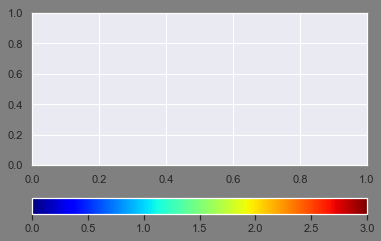

In [12]:
ax = plt.figure()
ax.add_subplot()
ax.set_facecolor([.5,.5,.5])
ax.colorbar(cmap,orientation='horizontal')
R, G, B, A = [0, 0, 0, 0]
plt.gcf().set_facecolor([.5,.5,.5])
plt.savefig('/Users/maxfrohlich/Desktop/colorbar.jpeg', dpi=400, bbox_inches='tight', facecolor = fig.get_facecolor(), transparent = True)
plt.show()

In [13]:
bbgroup = cd_bbh[cd_bbh.bbh>=5]
no_bbgroup = cd_bbh[cd_bbh.bbh < 5]
_, p = ttest_ind(bbgroup.c, no_bbgroup.c)
print("ttest for whether or not curvature differs signficantly from bird-beak group: \n p = {:.3f}".format(p))
_, p = ttest_ind(bbgroup.d, no_bbgroup.d)
print("ttest for whether or not diameter differs signficantly from bird-beak group: \n p = {:.3f}".format(p))

_, p = ttest_ind(bbgroup.g, no_bbgroup.g)
print("ttest for whether or not oversizing differs signficantly from bird-beak group: \n p = {:.3f}".format(p))

_, p = ttest_ind(bbgroup.cd, no_bbgroup.cd)
print("ttest for whether or not cd differs signficantly from bird-beak group: \n p = {:.3f}".format(p))


ttest for whether or not curvature differs signficantly from bird-beak group: 
 p = 0.144
ttest for whether or not diameter differs signficantly from bird-beak group: 
 p = 0.016
ttest for whether or not oversizing differs signficantly from bird-beak group: 
 p = 0.198
ttest for whether or not cd differs signficantly from bird-beak group: 
 p = 0.007


In [14]:
avg_c_bb = bbgroup.c.mean()
std_c_bb = bbgroup.c.std()
avg_c_no_bb = no_bbgroup.c.mean()
std_c_no_bb = no_bbgroup.c.std()

print("Bird-beak group mean curvature = {:.3f} ± {:.3f} mm-1".format(avg_c_bb, std_c_bb))
print("No bird-beak group mean curvature = {:.3f} ± {:.3f} mm-1".format(avg_c_no_bb, std_c_no_bb))

print("\n")
avg_d_bb = bbgroup.d.mean()
std_d_bb = bbgroup.d.std()
avg_d_no_bb = no_bbgroup.d.mean()
std_d_no_bb = no_bbgroup.d.std()

print("Total mean diameter = {:.1f} ± {:.1f} mm".format(cd_bbh.d.mean(), cd_bbh.d.std()))
print("Bird-beak group mean diameter = {:.1f} ± {:.1f} mm".format(avg_d_bb, std_d_bb))
print("No bird-beak group mean diameter = {:.1f} ± {:.1f} mm".format(avg_d_no_bb, std_d_no_bb))


print("\n")
avg_g_bb = bbgroup.g.mean()
std_g_bb = bbgroup.g.std()
avg_g_no_bb = no_bbgroup.g.mean()
std_g_no_bb = no_bbgroup.g.std()

print("Total mean oversizing = {:.1f} ± {:.1f}%".format((cd_bbh.g.mean()-1)*100, cd_bbh.g.std()*100))
print("Bird-beak group mean oversizing = {:.1f} ± {:.1f}%".format((avg_g_bb-1)*100, std_g_bb*100))
print("No bird-beak group mean oversizing = {:.1f} ± {:.1f}%".format((avg_g_no_bb-1)*100, std_g_no_bb*100))

print("\n")
avg_cd_bb = bbgroup.cd.mean()
std_cd_bb = bbgroup.cd.std()
avg_cd_no_bb = no_bbgroup.cd.mean()
std_cd_no_bb = no_bbgroup.cd.std()

print("Total mean cd = {:.1f} ± {:.1f}".format(cd_bbh.cd.mean(), cd_bbh.cd.std()))
print("Bird-beak group mean cd = {:.1f} ± {:.1f}".format(avg_cd_bb, std_cd_bb))
print("No bird-beak group mean cd = {:.1f} ± {:.1f}".format(avg_cd_no_bb, std_cd_no_bb))


Bird-beak group mean curvature = 0.041 ± 0.012 mm-1
No bird-beak group mean curvature = 0.033 ± 0.014 mm-1


Total mean diameter = 34.4 ± 4.4 mm
Bird-beak group mean diameter = 36.5 ± 2.4 mm
No bird-beak group mean diameter = 32.1 ± 5.0 mm


Total mean oversizing = 8.6 ± 8.8%
Bird-beak group mean oversizing = 6.2 ± 9.0%
No bird-beak group mean oversizing = 11.2 ± 8.2%


Total mean cd = 1.3 ± 0.4
Bird-beak group mean cd = 1.5 ± 0.4
No bird-beak group mean cd = 1.0 ± 0.3


In [15]:
# 8.6 ± 8.8% 6.2 ± 9.0% 11.2 ± 8.2%
r, p = pearsonr(cd_bbh.c, cd_bbh.bbh)
print("Curvature vs bird-beak height R = {:.2f}, P = {:.3f}".format(r, p))

r, p = pearsonr(cd_bbh.d, cd_bbh.bbh)
print("Diameter vs bird-beak height R = {:.2f}, P = {:.3f}".format(r, p))

r, p = pearsonr(cd_bbh.g, cd_bbh.bbh)
print("Oversizing vs bird-beak height R = {:.2f}, P = {:.3f}".format(r, p))

Curvature vs bird-beak height R = 0.40, P = 0.073
Diameter vs bird-beak height R = 0.41, P = 0.066
Oversizing vs bird-beak height R = -0.26, P = 0.264


# Methods Figures

In [17]:
# Use patient 1 as a model
# Save path
fig_save_path = '/Users/maxfrohlich/Dropbox/Stanford-SJSU-Manuscript/Manuscript/Figures/Methods Figures/'

# Aortic contours
p1_acounters_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_post_ID_contours.csv"

# Graft contours
p1_gcontours_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_endograft.csv"

# Aortic innerline
p1_aorta_line_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_post_ID_smoothed_innerline.csv"

# Aortic centerline
p1_centerline_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/coord_smooth_T1post_ID_aorta2.txt"

# Landing point
p1_plp_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_post_ID_a1plp.csv"

# Graft inner point
p1_gi_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_gi.csv"

# Graft inner line
p1_graft_inner_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_graft_inner.csv"

# Circle 3d curvature

p1_curve_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_circle_fit.csv"
p1_curve_pts_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_circle_curve_pts.csv"

# LCCA reference point
p1_lcca_ref_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_postID_LCCA_reference_point.csv"

# LCCA Innerline Arclength

p1_lcca_innerline_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_postop_lcca_innerline_ref.csv"

# Load data
p1_aorta = pd.read_csv(p1_acounters_fn, names=('n','x','y','z'))
p1_graft = pd.read_csv(p1_gcontours_fn, names=('n','x','y','z'))
p1_innerline = pd.read_csv(p1_aorta_line_fn, names=('i','x','y','z'))
p1_gi= pd.read_csv(p1_gi_fn, names=('x','y','z'))
p1_plp = pd.read_csv(p1_plp_fn, names=('x','y','z'))
p1_centerline = pd.read_csv(p1_centerline_fn, names=('x','y','z'), delimiter=' ')
p1_graft_inner = pd.read_csv(p1_graft_inner_fn, names=('x','y','z','i'))
p1_curve = pd.read_csv(p1_curve_fn, names=('x','y','z'))
p1_curve_pts = pd.read_csv(p1_curve_pts_fn, names=('x','y','z'))
p1_lcca_ref = pd.read_csv(p1_lcca_ref_fn, names=('x','y','z'))
p1_lcca_innerline = pd.read_csv(p1_lcca_innerline_fn, names=('x','y','z'))


In [18]:
# Caculate centroids of aorta

centroids = p1_aorta.groupby('n')[['x','y','z']].mean()



# Calculate center of mass of the arch
z1 = p1_centerline.iloc[0]['z']
p1_centerline_crop = p1_centerline[p1_centerline.z>=z1]
cmass = p1_centerline_crop.mean()

# Calculate aortic inner points
temp = []
for i in p1_aorta.n.unique():
    th.get_closest_point(cmass, p1_aorta[p1_aorta.n==i], temp)
innerline_points = pd.concat(temp)
# Calculate graft innerpoint

graft_c1 = p1_graft[p1_graft['n']==1]
graft_c1.set_index('n',inplace=True)



#th.get_closest_point(graft_c1.iloc[0], p1_innerline, temp)
#graft_innerpoint = pd.concat(temp)

## Plotting Function

In [19]:
def make_method_figure(aorta_on=True, 
                       endograft_on=True, 
                       innerpoint_on=True, 
                       innerline_on=True, 
                       arrows_on=True, 
                       cmass_on=True,
                       centroids_on=True,
                       graft_inner_on=True,
                       circle_fit=False,
                       curve_fit=False,
                       radius_on=False,
                       contour_1=False,
                       lcca=False,
                       plp_on=True,
                       first_contour=False,
                       aorta_alpha=1,
                       innerline_fontsize=50,
                       c1_size=20,
                       LCCA_refline=False,
                       graft_line_size=50,
                       endograft_alpha=1):
    if LCCA_refline:
        innerline_on=False
    # Numbers on grid
    fontsize=8
    
    fig = plt.figure(figsize=(50,30))
    ax = fig.add_subplot(1,1,1, projection='3d', frame_on=False)

    # Make background white
    ax.set_facecolor('white')

    # Makes grid background white
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    # Equal scale for units
    ax.set_aspect('equal')

    # Plot Aorta

    if aorta_on:
        ax.scatter3D(p1_aorta.x,
                     p1_aorta.y, 
                     p1_aorta.z, 
                     marker='.',
                     c='grey',
                     alpha=aorta_alpha)

    # Plot Endograft

    if endograft_on:
        ax.scatter3D(p1_graft.x,
                     p1_graft.y, 
                     p1_graft.z, 
                     marker='.',
                     c='r',
                     alpha=endograft_alpha)

    # Innerline
    if innerline_on:
        ax.scatter3D(p1_innerline.x,
                     p1_innerline.y, 
                     p1_innerline.z, 
                     marker='o',
                     c='b',
                     s=innerline_fontsize,
                     alpha=innerline_alpha)



    # Plot Innerline Points
    if innerpoint_on:
        ax.scatter3D(innerline_points.x,
                     innerline_points.y, 
                     innerline_points.z, 
                     marker='o',
                     facecolor='b',
                     edgecolor='b',
                     linewidth=2,
                     s=point_size)
    # COM to proximal landing zone
    if contour_1:
        c1 = innerline_points.iloc[[0]]
        c_line= th.interpolate(c1, cmass, 100)
        ax.scatter3D(c_line.x,
                     c_line.y,
                     c_line.z,
                     c='c',
                     s=c1_size)
        
    
    # Plot Centroids Used to Derive Center of Mass
    if centroids_on:
        ax.scatter3D(cmass_c.x,
                     cmass_c.y, 
                     cmass_c.z, 
                     marker='o',
                     c='b',
                     s=75)

    # Plot Center of Mass 
    if cmass_on:
        ax.scatter3D(cmass.x,
                     cmass.y, 
                     cmass.z, 
                     marker='+',
                     c='b',
                     s=50)

    # Graft Innerline
    if graft_inner_on:
        ax.scatter3D(p1_graft_inner.x,
                     p1_graft_inner.y, 
                     p1_graft_inner.z, 
                     marker='o',
                     c='orangered',
                     s=graft_line_size,
                     alpha=endograft_alpha)
    
    # Circle fit
    if circle_fit:
        ax.scatter3D(p1_curve.x,
                     p1_curve.y, 
                     p1_curve.z, 
                     marker='.',
                     c='k',
                     s=innerline_fontsize/6,
                     alpha=.9)
        ax.scatter3D(p1_curve.mean().x,
                     p1_curve.mean().y, 
                     p1_curve.mean().z, 
                     marker='o',
                     c='k',
                     s=innerline_fontsize,
                     alpha=.9)
    if radius_on:
        radius = th.interpolate(p1_curve.mean(), p1_plp, 100)
        ax.scatter3D(radius.x,
                     radius.y, 
                     radius.z, 
                     marker='.',
                     c='k',
                     s=innerline_fontsize/10,
                     alpha=.9)
        
    
    if curve_fit:
        ax.scatter3D(p1_curve_pts.x,
                     p1_curve_pts.y, 
                     p1_curve_pts.z, 
                     marker='o',
                     edgecolor='y', facecolors='k', linewidth=5,
                     s=innerline_fontsize*6,
                     alpha=1)
    if lcca:
        ax.scatter3D(p1_lcca_ref.x, 
                     p1_lcca_ref.y, 
                     p1_lcca_ref.z, 
                     s=50, 
                     c='b', 
                     marker='+')
        
    if arrows_on:
        
        # Arrow directional vectors
        u, w, v = [1,0,0] 
        u2, w2, v2 = [-1,0,0]
        
        # Arrow color, arrow length, width of arrow, ratio of arrow head to arrow body
        color, length, linewidth, aspect = ['k', 15, 5, 0.3]
        
        # Point to PLP
        ax.quiver(p1_plp.x, p1_plp.y, p1_plp.z, 
                  u, w, v, 
                  arrow_length_ratio=aspect, length=length, color=color, pivot='tip', linewidth=linewidth)
        
        # Point to endograft tip
#         ax.quiver(p1_gi.x, p1_gi.y, p1_gi.z, 
#                   u2, w2, v2, 
#                   arrow_length_ratio=aspect, length=length, color=color, pivot='tip', linewidth=linewidth)
        
    if plp_on:
        ax.scatter3D(p1_plp.x, 
                     p1_plp.y, 
                     p1_plp.z, 
                     marker='+', 
                     s=50, 
                     c='b')
    if first_contour:
        contour_1 = p1_aorta.copy()[p1_aorta.n==1]
        ax.scatter3D(contour_1.x,
                     contour_1.y,
                     contour_1.z,
                     marker='.',
                     c='grey')
    lcca_line_filter = p1_innerline.apply(lambda point: points_within_tolerance(point, 
                                                                            p1_lcca_innerline, 
                                                                            0.01), axis=1)
    if LCCA_refline:
        
        innerline_adj = p1_innerline[~lcca_line_filter]
        ax.scatter3D(p1_lcca_innerline.x, 
                     p1_lcca_innerline.y, 
                     p1_lcca_innerline.z, 
                     c='c',
                     s=innerline_fontsize)
        ax.scatter3D(innerline_adj.x,
                     innerline_adj.y, 
                     innerline_adj.z, 
                     marker='o',
                     c='b',
                     s=innerline_fontsize,
                     alpha=innerline_alpha)
    
    # Set 
    ax.set_aspect('equal')    
    ax.view_init(elev=10., azim=150)
    ax.grid()
    ax.grid(color='k')


def points_within_tolerance(point, line, tolerance):
    """
    Given a point, 
    Determine if that point overlaps with any points on a second line with
    a given tolerance.
    """
    x = point['x']
    y = point['y']
    z = point['z']
    x0, x1 = x - tolerance, x + tolerance
    y0, y1 = y - tolerance, y + tolerance
    z0, z1 = z - tolerance, z + tolerance
    x_filter = line.x.between(x0, x1)
    y_filter = line.y.between(y0, y1)
    z_filter = line.z.between(z0, z1)
    overlap = line[x_filter & y_filter & z_filter]
    if len(overlap)>0:
        return True
    else:
        return False
    

    
innerline_alpha = 0.1

## Top fig

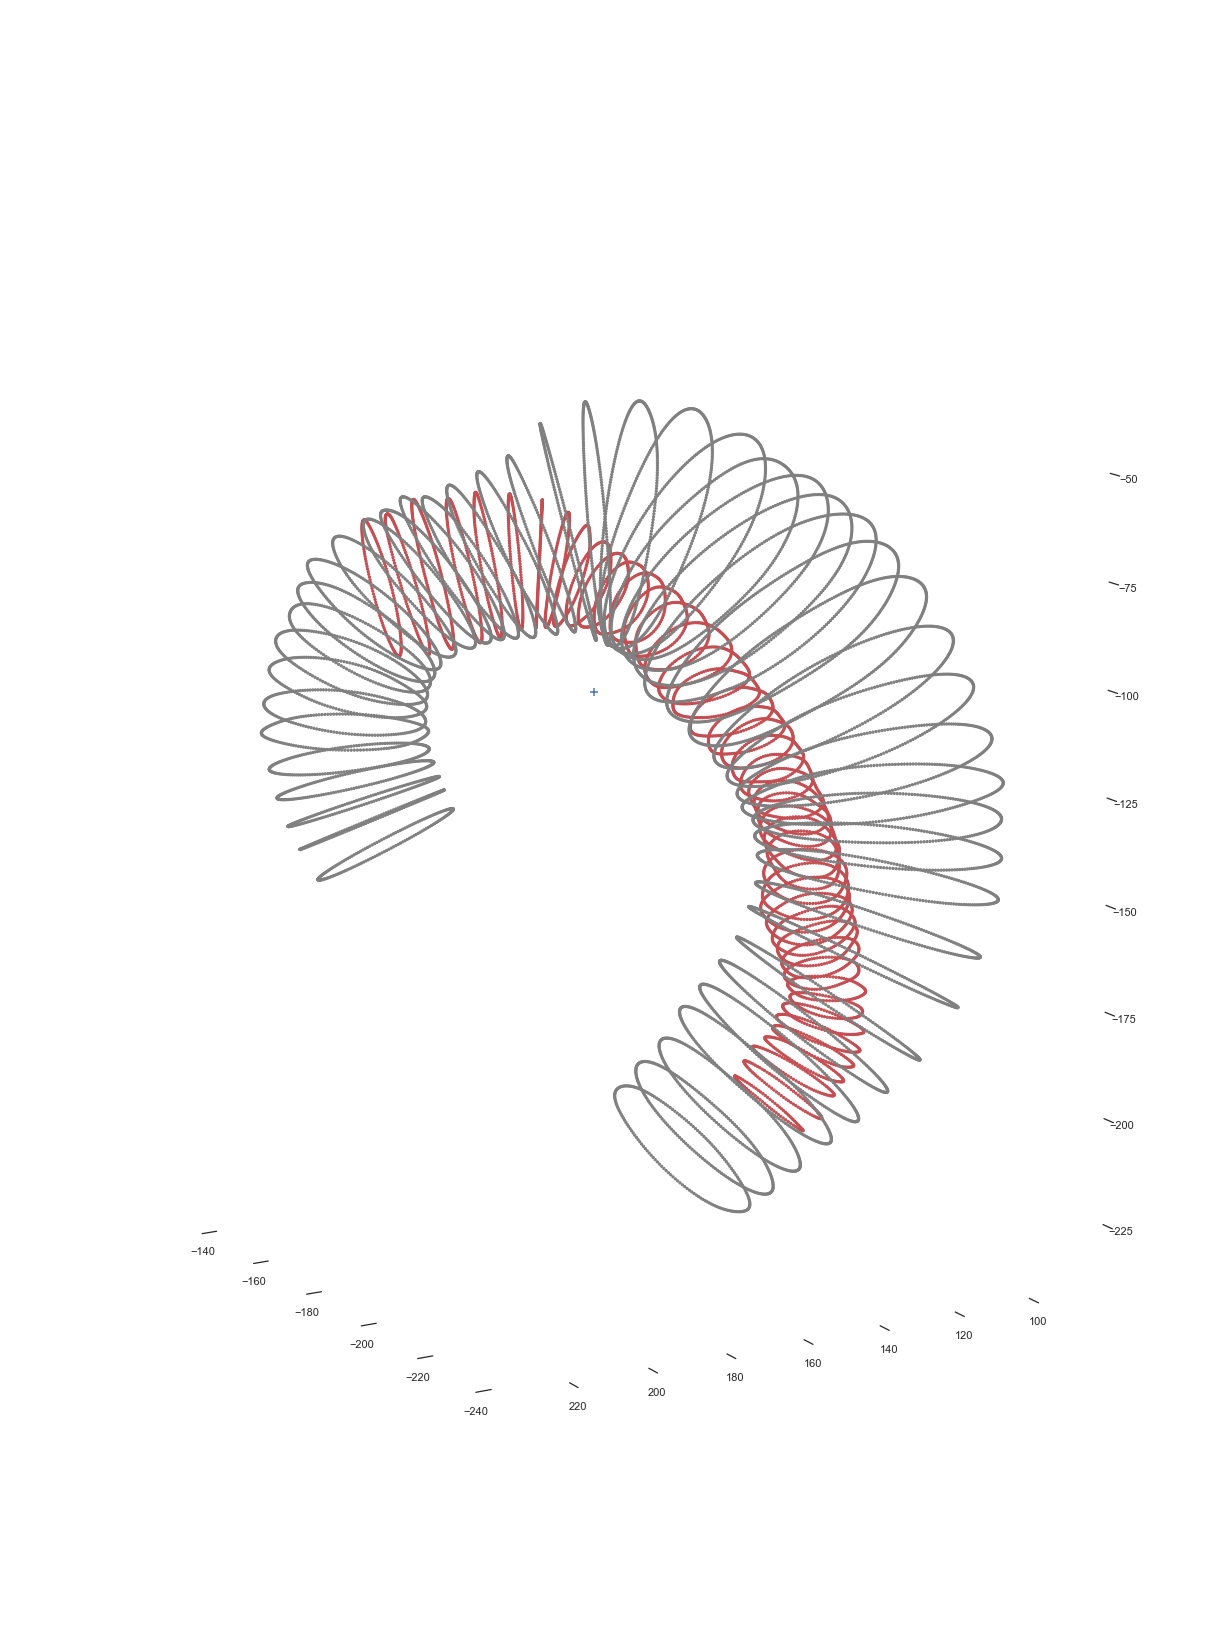

In [20]:
make_method_figure(centroids_on=False, 
                   innerline_on=False, 
                   graft_inner_on=False, 
                   arrows_on=False, 
                   contour_1=False,
                   innerpoint_on=False,
                   plp_on=False,
                   aorta_alpha=1,
                   c1_size=2.5)
plt.grid()
plt.savefig(fig_save_path + 'methods_top.png', dpi=400)


## Aorta graft and innerlines

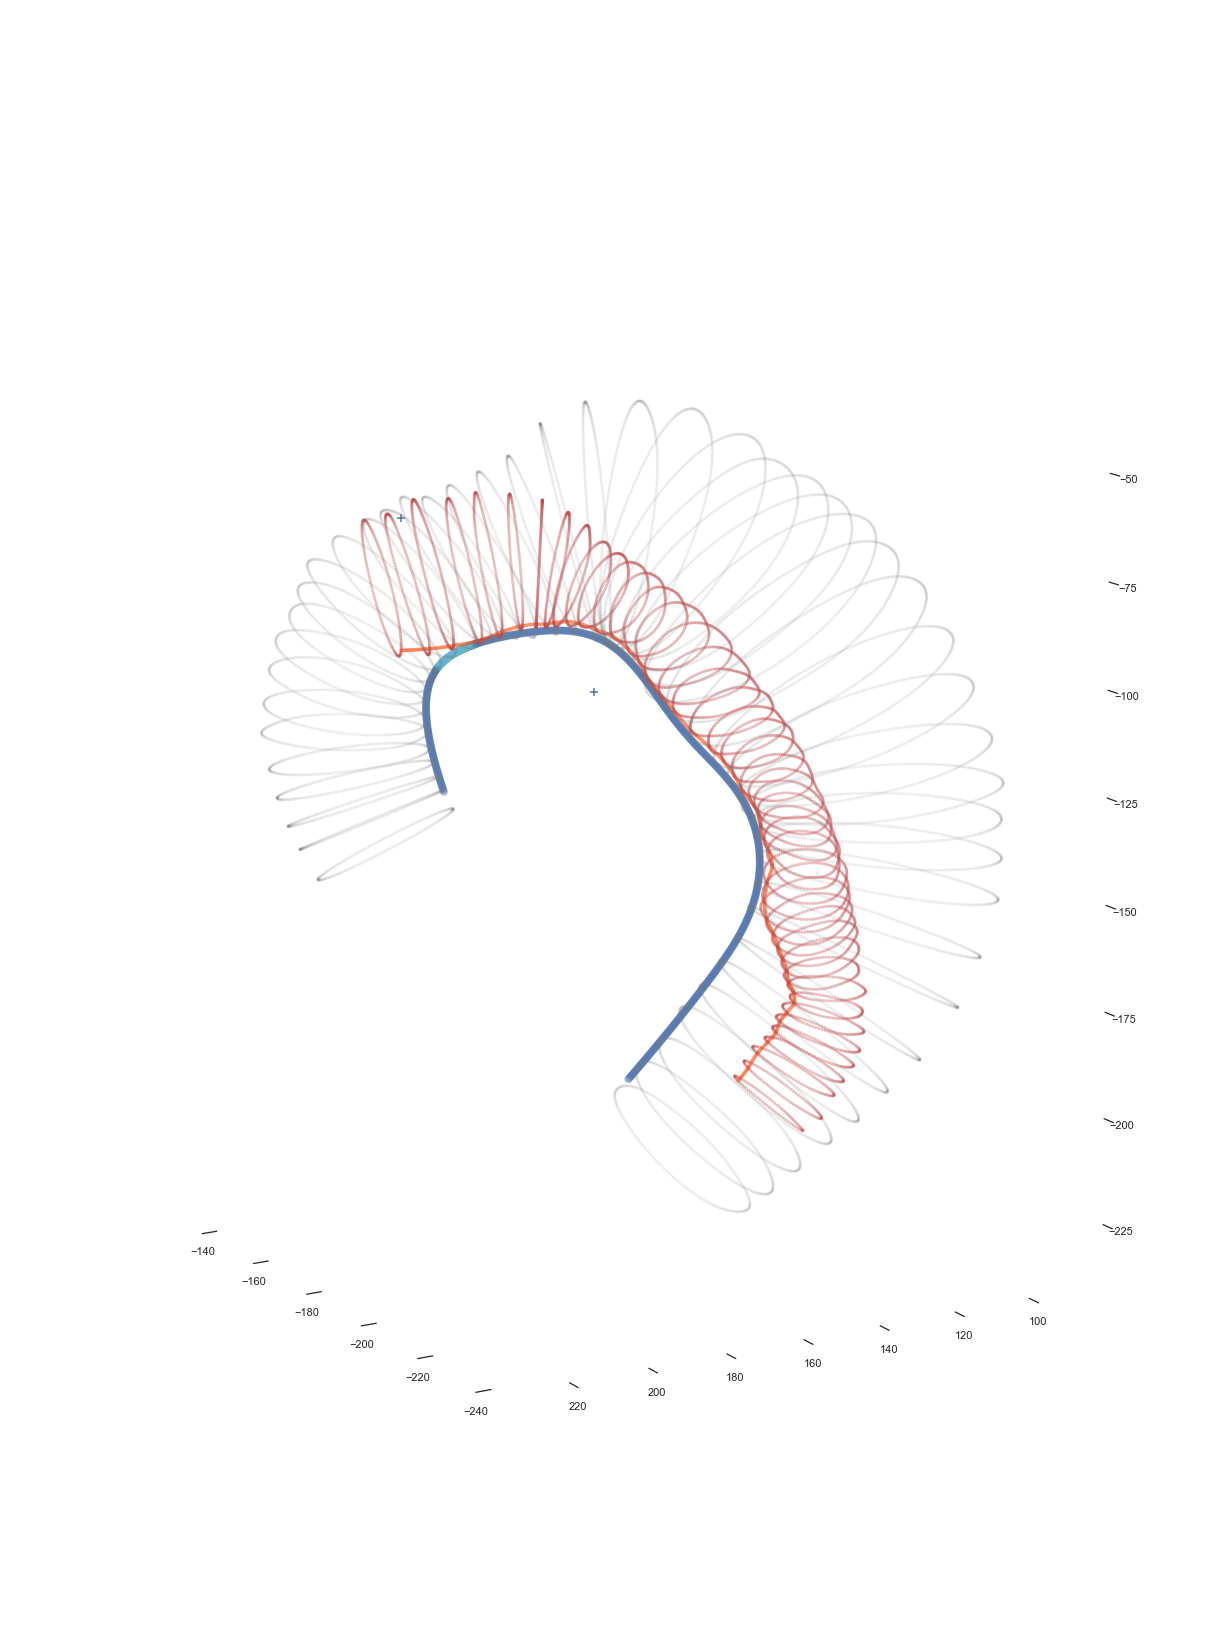

In [22]:
make_method_figure(centroids_on=False, innerpoint_on=False, arrows_on=False, lcca=True, LCCA_refline=True, aorta_alpha=.09, graft_line_size=10, endograft_alpha=.25)

#plt.savefig('/Users/maxfrohlich/Desktop/Manuscripts/Bird-beak Paper/Figure 3/postop_fiducial.png', dpi=800)
plt.show()

## Middle fig

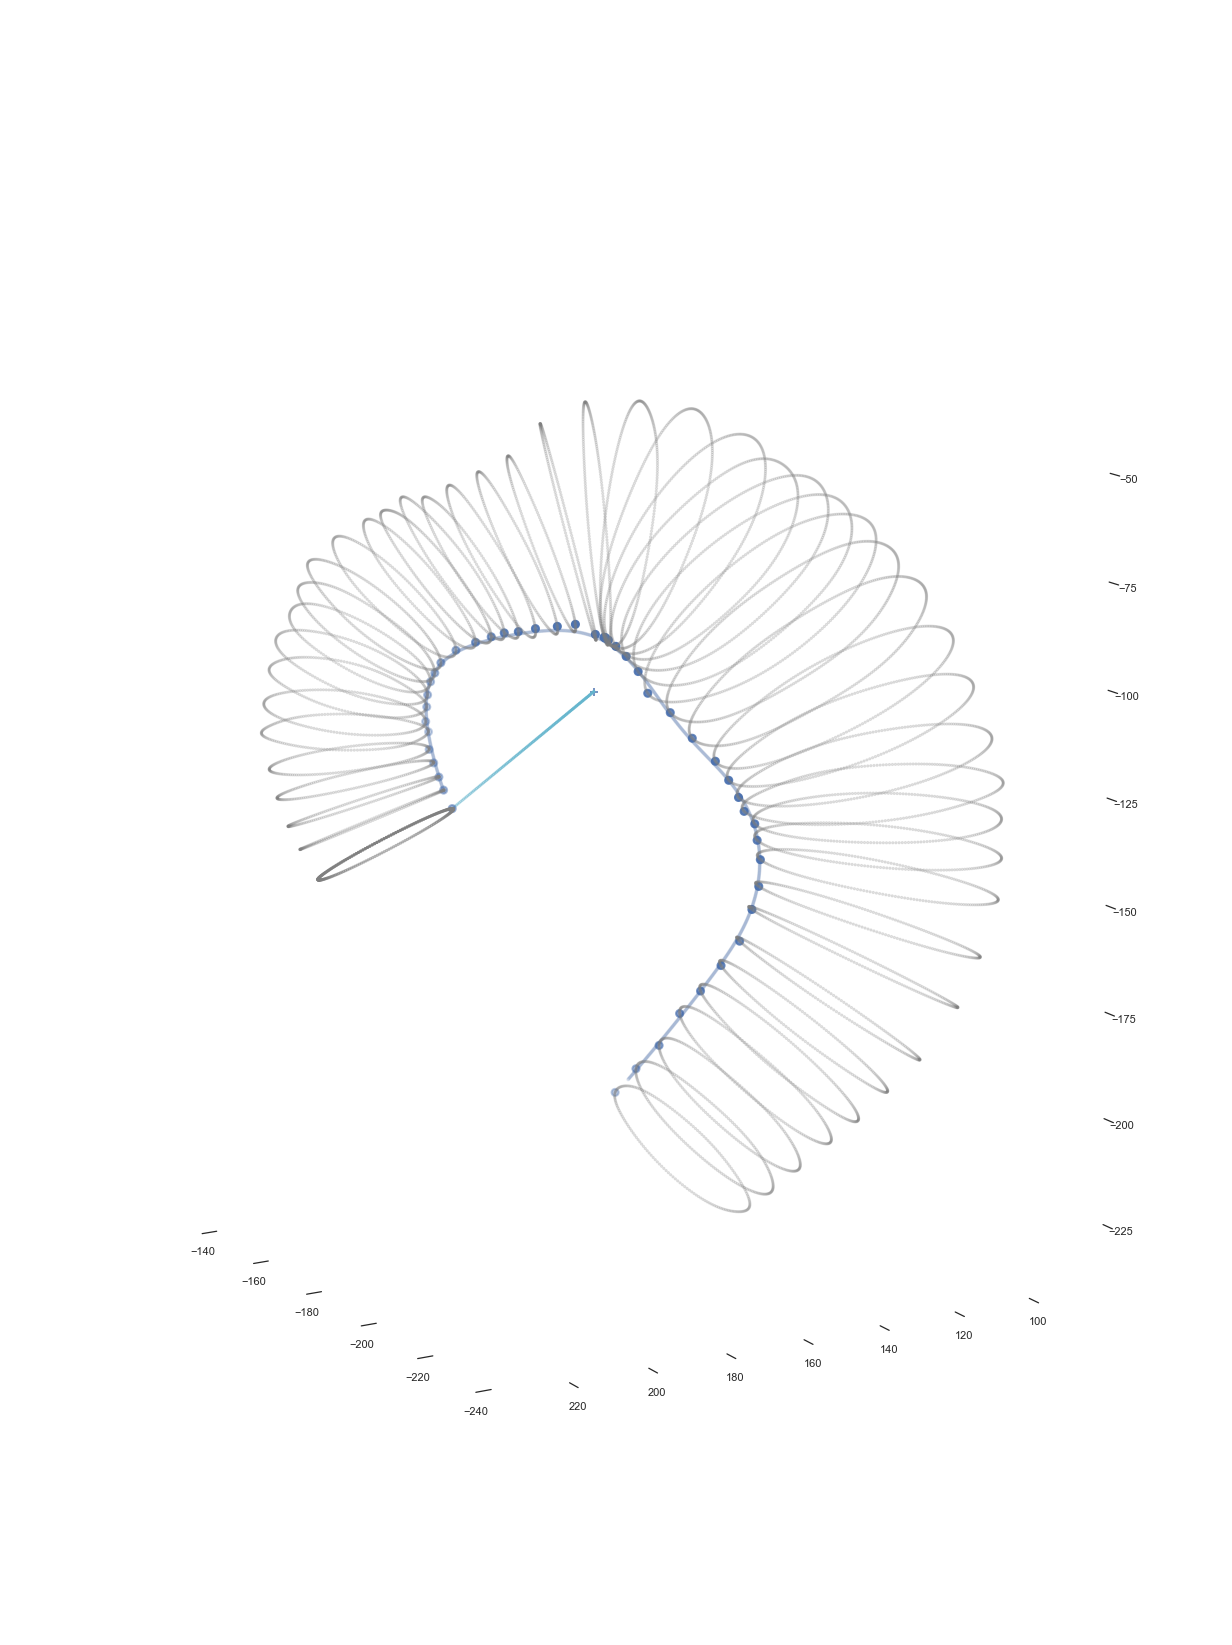

In [23]:
point_size = 50
innerline_alpha = 0.05
make_method_figure(aorta_on=True, 
                   aorta_alpha=0.2,
                   graft_inner_on=False, 
                   endograft_on=False,
                   centroids_on=False, 
                   innerpoint_on=True, 
                   arrows_on=False, 
                   plp_on=False,
                   first_contour=True,
                   innerline_fontsize=8,
                   innerline_on=True,
                   c1_size=5,
                   contour_1=True)
#plt.savefig(fig_save_path + 'methods_aorta_line.png', dpi=400)

## Aorta graft innerlines and circlefit

In [24]:
fig_save_path

'/Users/maxfrohlich/Dropbox/Stanford-SJSU-Manuscript/Manuscript/Figures/Methods Figures/'

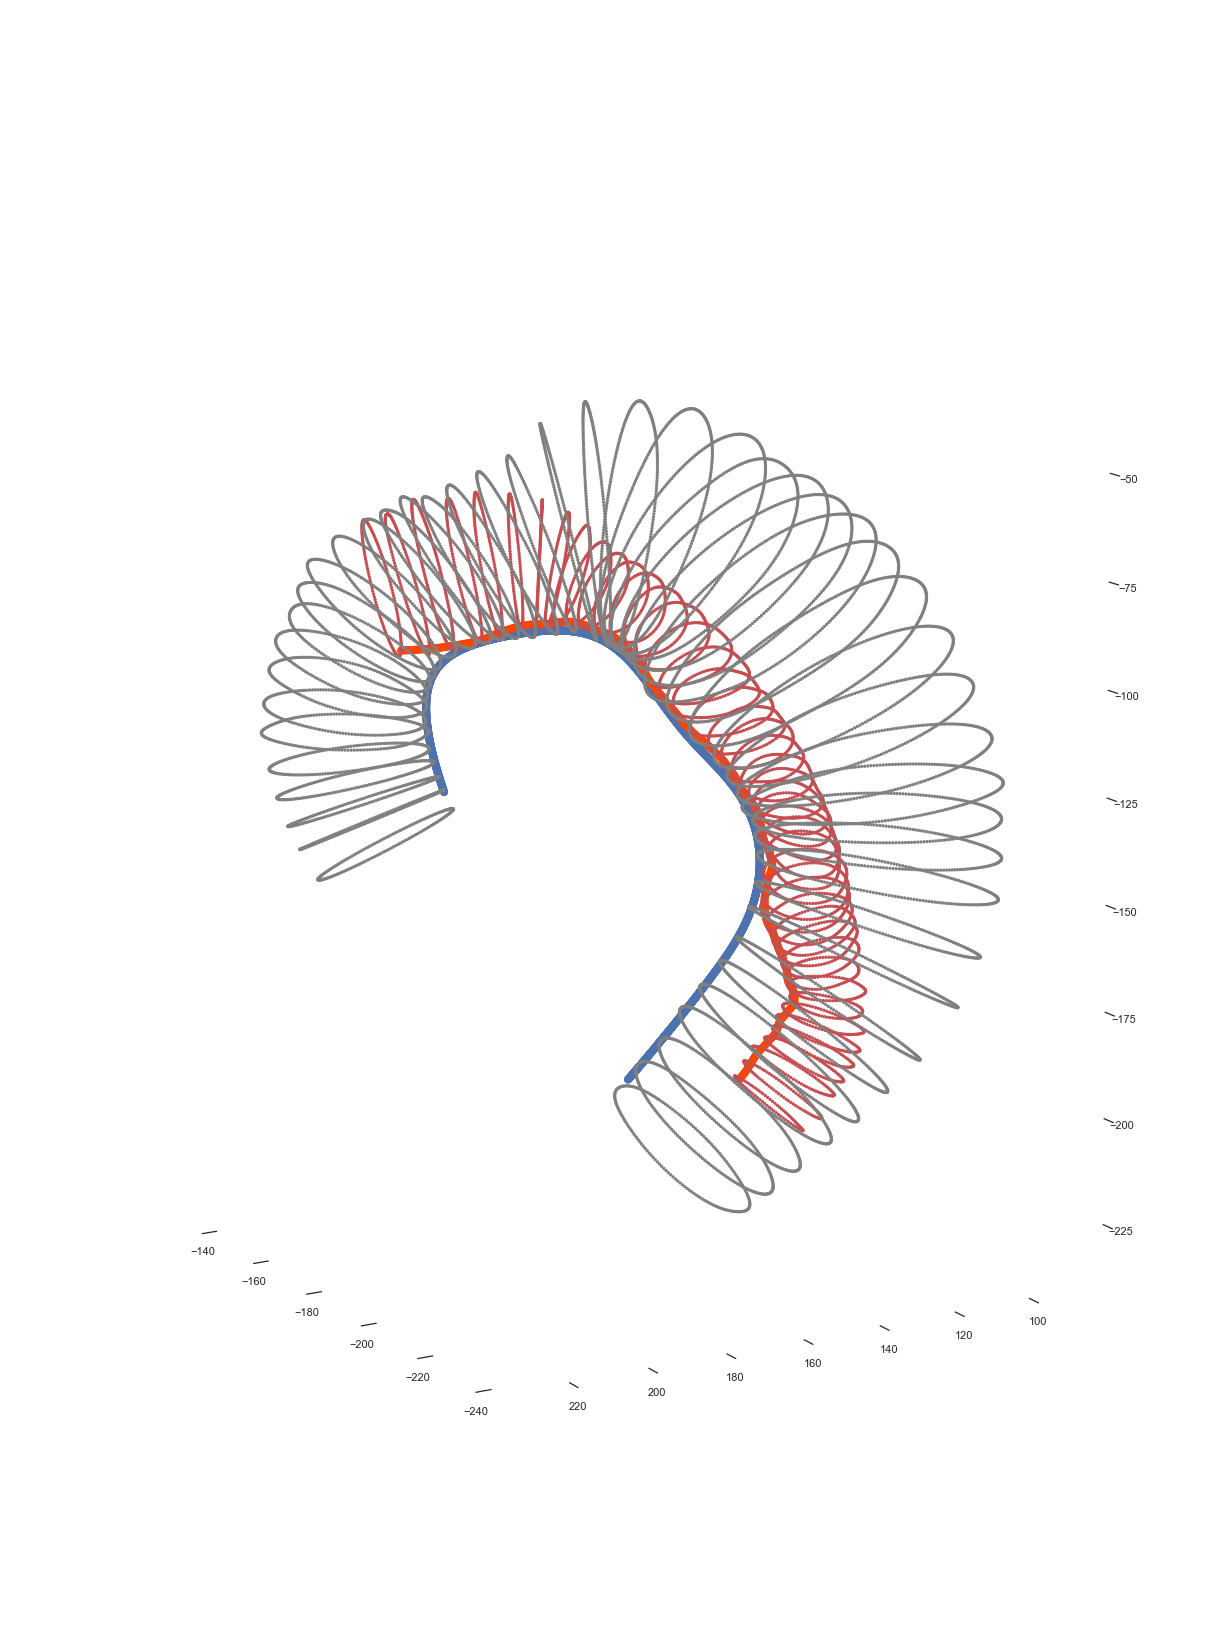

In [25]:
innerline_alpha = 1

make_method_figure(centroids_on=False, 
                   innerpoint_on=False, 
                   arrows_on=False, curve_fit=False, circle_fit=False, cmass_on=False, radius_on=False)
#plt.savefig(fig_save_path + 'bottom_image_bbpaper.png', dpi=400)

## Pre-op aorta

In [26]:
# Aortic contours
p1_acounters_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_pre_ID_contours.csv"
# Aortic innerline
p1_aorta_line_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_pre_ID_smoothed_innerline.csv"
# Landing point
p1_plp_fn = "/Users/maxfrohlich/DropBox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_pre_ID_a1plp.csv"
# Circle 3d curvature
p1_curve_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_circle_preop.csv"
# LCCA to innerline ref line
p1_lcca2inner_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_pre_id_lcca2inner_refline.csv"
# LCCA ref
p1_lcca_ref_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_preop_lcca_marker.csv"
# LCCA innerline to PLP line
p1_lcca_inner_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_preop_lcca_innerline_ref.csv"
# Circle fit pts
p1_circle_fit_pts_fn = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/T1_preop_circle_fit_pts.csv"


# Load data
p1_aorta = pd.read_csv(p1_acounters_fn, names=('n','x','y','z'))
p1_innerline = pd.read_csv(p1_aorta_line_fn, names=('i','x','y','z'))
p1_plp = pd.read_csv(p1_plp_fn, names=('x','y','z'))
p1_curve = pd.read_csv(p1_curve_fn, names=('x','y','z'))
p1_lcca2inner = pd.read_csv(p1_lcca2inner_fn)
p1_lcca = pd.read_csv(p1_lcca_ref_fn)
p1_lcca_inner = pd.read_csv(p1_lcca_inner_fn)
p1_circle_fit = pd.read_csv(p1_circle_fit_pts_fn)
def preop_fig(circle=False,aorta_alpha=0.25):
# Numbers on grid
    fontsize=8
    
    # Size of innerline of aorta and graft
    innerline_fontsize = 50
    
    fig = plt.figure(figsize=(50,30))
    ax = fig.add_subplot(1,1,1, projection='3d', frame_on=False)

    # Make background white
    #ax.set_facecolor('white')

    # Makes grid background white
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    # Equal scale for units
    ax.set_aspect('equal')

    # Plot Aorta
    ax.scatter3D(p1_aorta.x,
                 p1_aorta.y, 
                 p1_aorta.z, 
                 marker='.',
                 c='grey',
                 alpha=aorta_alpha)
    
    # Plot LCCA marker
    ax.scatter3D(p1_lcca.x, 
                 p1_lcca.y, 
                 p1_lcca.z,
                 marker='+',
                 c='b',
                 s=100)
              
    
#     ax.scatter3D(p1_innerline.x,
#                  p1_innerline.y, 
#                  p1_innerline.z, 
#                  marker='o',
#                  c='b',
#                  s=innerline_fontsize,
#                  alpha=0.1)
    
    # Plot curvature
    if circle:
        ax.scatter3D(p1_curve.x,
                     p1_curve.y, 
                     p1_curve.z, 
                     marker='.',
                     c='k',
                     s=innerline_fontsize/6,
                     alpha=.9)
        # Plot center of curvature
        ax.scatter3D(p1_curve.mean().x,
                     p1_curve.mean().y, 
                     p1_curve.mean().z, 
                     marker='o',
                     c='k',
                     s=innerline_fontsize,
                     alpha=.9)

        # Plot radius of curvature
        radius = th.interpolate(p1_curve.mean(), p1_plp, 100)
        ax.scatter3D(radius.x,
                     radius.y, 
                     radius.z, 
                     marker='.',
                     c='k',
                     s=innerline_fontsize/10,
                     alpha=.6)

        # Plot curve fitting points
        circle_1 = p1_circle_fit.iloc[[0]]
        circle_2 = p1_circle_fit.iloc[[2]]
        radius_1 = th.interpolate(p1_curve.mean(), circle_1, 100)
        radius_2 = th.interpolate(p1_curve.mean(), circle_2, 100)
  
        ax.scatter3D(radius_1.x,
                     radius_1.y, 
                     radius_1.z, 
                     marker='.',
                     c='k',
                     s=innerline_fontsize/10,
                     alpha=.6)
        ax.scatter3D(radius_2.x,
                     radius_2.y, 
                     radius_2.z, 
                     marker='.',
                     c='k',
                     s=innerline_fontsize/10,
                     alpha=.6)
    
    
#         ax.scatter3D(p1_circle_fit.x,
#                      p1_circle_fit.y, 
#                      p1_circle_fit.z, 
#                      marker='o',
#                      edgecolor='y', facecolors='k', linewidth=5,
#                      s=innerline_fontsize*6,
#                      alpha=1)
    
    # Plot LCCA

#     ax.scatter3D(p1_lcca_inner.x,
#                  p1_lcca_inner.y,
#                  p1_lcca_inner.z,
#                  marker='o',
#                  s=innerline_fontsize*3,
#                  alpha=1,
#                  c='c')
    
    lcca_line_filter = p1_innerline.apply(lambda point: points_within_tolerance(point, 
                                                                        p1_lcca_inner, 
                                                                        0.01), axis=1)
    innerline_adj = p1_innerline[~lcca_line_filter]
    ax.scatter3D(p1_lcca_inner.x, 
                 p1_lcca_inner.y, 
                 p1_lcca_inner.z, 
                 c='c',
                 s=innerline_fontsize)
    ax.scatter3D(innerline_adj.x,
                 innerline_adj.y, 
                 innerline_adj.z, 
                 marker='o',
                 c='b',
                 s=innerline_fontsize,
                 alpha=innerline_alpha)
    
    # Set view
    ax.view_init(elev=10., azim=150)
    return



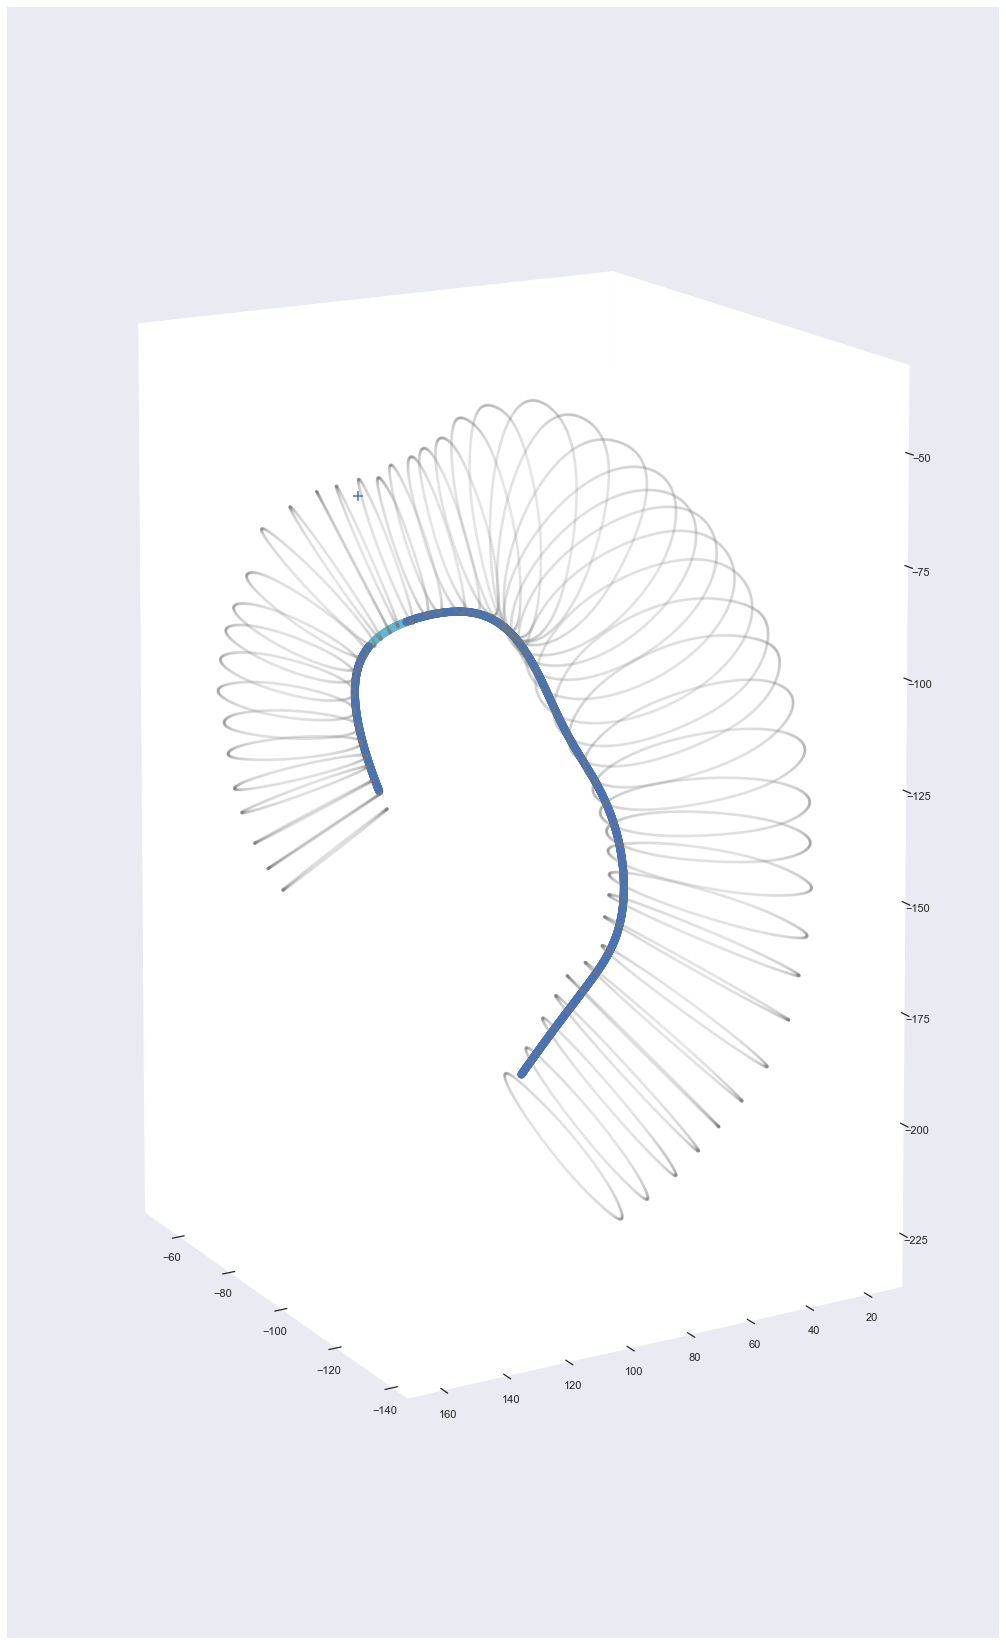

In [27]:

preop_fig(aorta_alpha=.09)
#plt.show()
#plt.savefig("/Users/maxfrohlich/Desktop/Manuscripts/Bird-beak Paper/Figure 3/preop_fiducial.png", dpi=800)

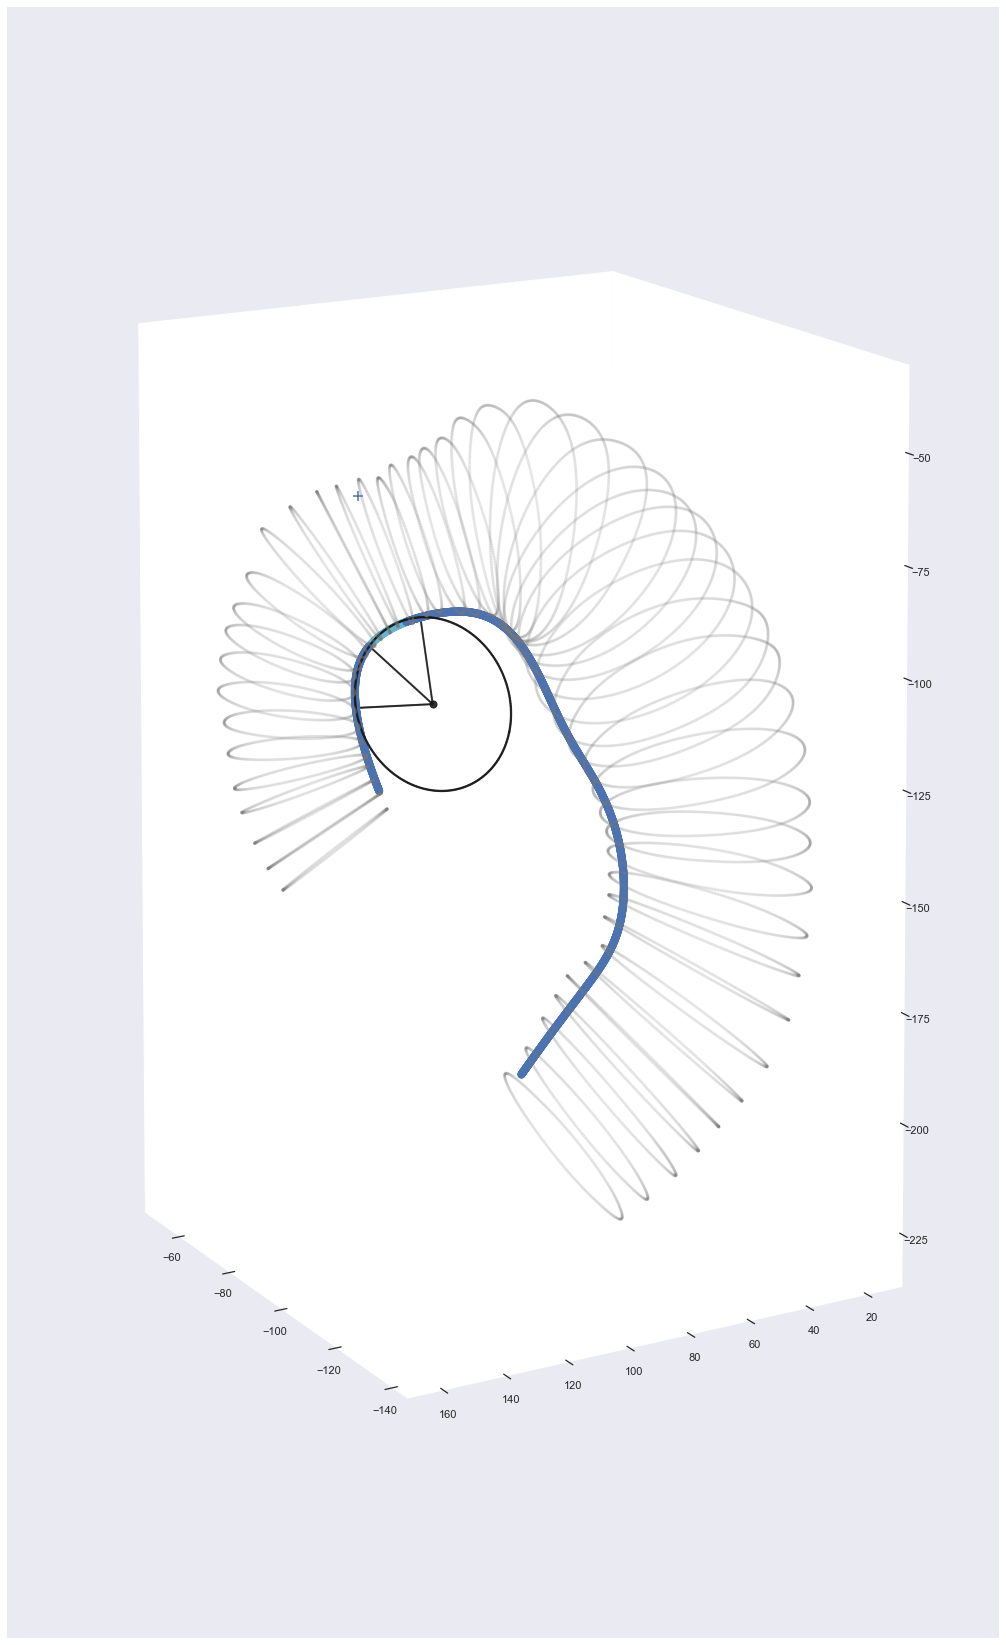

In [28]:
preop_fig(circle=True, aorta_alpha=.09)
#plt.savefig("/Users/maxfrohlich/Desktop/Manuscripts/Bird-beak Paper/Figure 3/preop_curve_fiducial.png", dpi=800)
plt.show()

# Results

In [29]:
results_data = pd.merge(cd_bbh.copy(), bbl_bba[['bbl', 'bba']],left_index=True, right_index=True)
results_data['group'] = results_data['bbh'].apply(lambda x: 'BB' if x >= 5 else 'NBB')
results_data['g'] = results_data['g'].apply(lambda x: (x-1)*100)
results_data_all = results_data.copy()
results_data_all['group'] = 'All'
results_data = pd.concat([results_data, results_data_all])
results_data.rename(columns={'cd': 'CD', 
                                    'bbh': 'BBH (mm)', 
                                    'c':'Curvature (mm-1)', 
                                    'd':'Diameter (mm)', 
                                    'g':'Graft Oversizing (%)',
                                    'bba': 'BBA (deg)',
                                    'bbl': 'BBL (mm)'},inplace=True)
results_data_output = results_data.groupby('group').agg([np.mean, np.std]).reset_index()


results_data_output
one_sigfig = ['BBL (mm)', 'BBH (mm)','Diameter (mm)','CD']
three_sigfig = ['Curvature (mm-1)']
results_temp = []
cols = ['Curvature (mm-1)', 'Diameter (mm)', 'CD', 'Graft Oversizing (%)','BBL (mm)', 'BBH (mm)', 'BBA (deg)']
for col in cols:
    fstring = "{0:.3f} ± {1:.3f}" if col in three_sigfig else ("{0:.1f} ± {1:.1f}" if col in one_sigfig else "{0:.0f} ± {1:.0f}")
    mean_std = results_data_output[col]
    mean_std['mean ± std'] = mean_std.apply(lambda x: fstring.format(x['mean'], x['std']),axis=1)
    mean_std.drop(columns=['mean', 'std'],inplace=True)
    mean_std.index = ['All', 'BB', 'NBB']
    mean_std.columns = pd.MultiIndex.from_product([[col], mean_std.columns])
    results_temp.append(mean_std)
results_data_output = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True),results_temp)
#display(results_data_output)    
for feat in cols:
    bbgroup = results_data[results_data['group'] == 'BB']
    nobbgroup = results_data[results_data['group'] == 'NBB']
    s, p = ttest_ind(bbgroup[feat], nobbgroup[feat])
    results_data_output.loc['p-value', feat] = ['{:.3f}'.format(p)]
results_data_output.fillna('',inplace=True)
    
results_data_output = results_data_output.transpose()
#display(results_data_output)
#writer = pd.ExcelWriter("/Users/maxfrohlich/Dropbox/Stanford-SJSU-Manuscript/Manuscript/Figures/bb_groups_demo.xlsx")
#results_data_output.to_excel(writer, 'sheet1')


/Users/maxfrohlich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/maxfrohlich/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
results_data_output    
    
    

All             BB            NBB  \
Curvature (mm-1)     mean ± std  0.037 ± 0.013  0.041 ± 0.012  0.033 ± 0.014   
Diameter (mm)        mean ± std     34.4 ± 4.4     36.5 ± 2.4     32.1 ± 5.0   
CD                   mean ± std      1.3 ± 0.4      1.5 ± 0.4      1.0 ± 0.3   
Graft Oversizing (%) mean ± std          9 ± 9          6 ± 9         11 ± 8   
BBL (mm)             mean ± std      5.0 ± 4.4      8.4 ± 3.3      1.3 ± 1.5   
BBH (mm)             mean ± std      4.7 ± 2.7      6.8 ± 1.6      2.5 ± 1.4   
BBA (deg)            mean ± std        25 ± 11         28 ± 8        22 ± 12   

                                p-value  
Curvature (mm-1)     mean ± std   0.144  
Diameter (mm)        mean ± std   0.016  
CD                   mean ± std   0.007  
Graft Oversizing (%) mean ± std   0.198  
BBL (mm)             mean ± std   0.000  
BBH (mm)             mean ± std   0.000  
BBA (deg)            mean ± std   0.146

In [31]:
results_data_output.index.name #.pivot(index='group', columns=['mean','std'])

In [35]:
results_data_corr = results_data[results_data.group == 'All']
bba_out = []
bbl_out = []
bbh_out = []
for feat in ['CD','Curvature (mm-1)', 'Diameter (mm)', 'g']:
    current_feat = results_data_corr[feat]
    bba = results_data_corr['BBA (deg)']
    bbl = results_data_corr['BBL (mm)']
    bbh = results_data_corr['BBH (mm)']
    bba_r, bba_p = pearsonr(current_feat, bba)
    bbl_r, bbl_p = pearsonr(current_feat, bbl)
    bbh_r, bbh_p = pearsonr(current_feat, bbh)
    bba_out.append(pd.DataFrame({'r-value': [bba_r], 'p-value':[bba_p]},index=[feat]))
    bbl_out.append(pd.DataFrame({'r-value': [bbl_r], 'p-value':[bbl_p]},index=[feat]))
    bbh_out.append(pd.DataFrame({'r-value': [bbh_r], 'p-value':[bbh_p]},index=[feat]))
bbl_corr = pd.concat(bbl_out)
bba_corr = pd.concat(bba_out)
bbh_corr = pd.concat(bbh_out)
bbal_corr = pd.concat({'BBL Correlation':bbl_corr, 
                       'BBA Correlation': bba_corr,
                       'BBH Correlation': bbh_corr})
bbal_corr.rename({'cd': 'Curvature * Diameter',
                  'c': 'Curvature (mm-1)',
                  'd': 'Diameter (mm)',
                  'g': 'Percent Graft Oversizing'}, inplace=True)
#bbal_corr.to_csv('/Users/maxfrohlich/Dropbox/figure_1_raw/bba_bbl.csv')
#writer = pd.ExcelWriter("/Users/maxfrohlich/Dropbox/figure_1_raw/bba_bbl.xlsx")
#bbal_corr.to_excel(writer, 'sheet1')
bbal_corr

KeyError: 'c'